In [836]:
# !pip3 install matplotlib
# !pip3 install seaborn
# !pip3 install scipy
# !pip3 install openpyxl



In [837]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
#from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
#%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [838]:
shanghai_Rank2022 = pd.read_excel("Data/shanghai Ranking.xlsx")
shanghai_Rank2023 = pd.read_csv("Data/shanghai-ranking_2023.csv")
Times_Higher_Rank = pd.read_excel("Data/Times Higher Education.xlsx")
World_Rank = pd.read_excel("Data/Word Rank University.xlsx")


### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [839]:
print("The size of dataset shanghai Ranking is \n" , shanghai_Rank2023.shape ,"\nThe size of dataset Times Higher Education is \n" , Times_Higher_Rank.shape ,"\nThe size of dataset World Rank University is \n" , World_Rank.shape )

The size of dataset shanghai Ranking is 
 (1000, 19) 
The size of dataset Times Higher Education is 
 (1591, 20) 
The size of dataset World Rank University is 
 (2000, 9)


# Shanghai Rank 2022  Academic Ranking

In [840]:
shanghai_Rank2022.head()

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail
0,1,Harvard University,1,100.0,http://www.shanghairanking.com/_uni/logo/032bd...,http://www.shanghairanking.com/institution/har...
1,2,Stanford University,2,76.8,http://www.shanghairanking.com/_uni/logo/13de8...,http://www.shanghairanking.com/institution/sta...
2,3,Massachusetts Institute of Technology (MIT),3,70.1,http://www.shanghairanking.com/_uni/logo/79165...,http://www.shanghairanking.com/institution/mas...
3,4,University of Cambridge,1,69.6,http://www.shanghairanking.com/_uni/logo/8d986...,http://www.shanghairanking.com/institution/uni...
4,5,"University of California, Berkeley",4,65.3,http://www.shanghairanking.com/_uni/logo/0ff17...,http://www.shanghairanking.com/institution/uni...


In [841]:
shanghai_Rank2022

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail
0,1,Harvard University,1,100.0,http://www.shanghairanking.com/_uni/logo/032bd...,http://www.shanghairanking.com/institution/har...
1,2,Stanford University,2,76.8,http://www.shanghairanking.com/_uni/logo/13de8...,http://www.shanghairanking.com/institution/sta...
2,3,Massachusetts Institute of Technology (MIT),3,70.1,http://www.shanghairanking.com/_uni/logo/79165...,http://www.shanghairanking.com/institution/mas...
3,4,University of Cambridge,1,69.6,http://www.shanghairanking.com/_uni/logo/8d986...,http://www.shanghairanking.com/institution/uni...
4,5,"University of California, Berkeley",4,65.3,http://www.shanghairanking.com/_uni/logo/0ff17...,http://www.shanghairanking.com/institution/uni...
...,...,...,...,...,...,...
995,901-1000,University of Wuppertal,46-47,0.0,http://www.shanghairanking.com/_uni/logo/2ab2f...,http://www.shanghairanking.com/institution/uni...
996,901-1000,Warsaw University of Technology,7-11,0.0,http://www.shanghairanking.com/_uni/logo/a347c...,http://www.shanghairanking.com/institution/war...
997,901-1000,Western Norway University of Applied Sciences,6-7,0.0,http://www.shanghairanking.com/_uni/logo-jpg/d...,http://www.shanghairanking.com/institution/wes...
998,901-1000,Wroclaw University of Science and Technology,7-11,0.0,http://www.shanghairanking.com/_uni/logo/ed480...,http://www.shanghairanking.com/institution/wro...


# Shanghai Rank 2023  Academic Ranking

In [842]:
# Some ranks are duplicated because some universities obtained the same rank and the next rank is skipped accordingly

In [843]:
# Rankings are grouped into ranges after 100 rank, with every 150 ranks forming a separate range. 
# then after 200 rank every 200 ranks forming a separate range. 

In [844]:
shanghai_Rank2023.head()

,Rank,Logo,Name,Link,Website,Flag,Country,Region,Foundation_year,Address,Intro,Total_Enrollment,Total_International_Enrollment,UG_Enrollment,International_UG_Enrollment,PG_Enrollment,International_PG_Enrollment,latitude,longitude
0,1,https://www.shanghairanking.com/_uni/logo/032b...,Harvard University,https://www.shanghairanking.com/institution/ha...,http://www.harvard.edu,https://www.shanghairanking.com/_pub/country-f...,United States,North America,1636,"Harvard University, Cambridge, Massachusetts ...",Harvard University is devoted to excellence in...,41987,24.0,14467,10.1,27520,20.1,42.367909,-71.126782
1,2,https://www.shanghairanking.com/_uni/logo/13de...,Stanford University,https://www.shanghairanking.com/institution/st...,http://www.stanford.edu,https://www.shanghairanking.com/_pub/country-f...,United States,North America,1885,450 Serra Mall,Stanford University is a research university t...,16163,24.0,6994,10.7,9169,34.2,37.431314,-122.169365
2,3,https://www.shanghairanking.com/_uni/logo/7916...,Massachusetts Institute of Technology (MIT),https://www.shanghairanking.com/institution/ma...,http://web.mit.edu/,https://www.shanghairanking.com/_pub/country-f...,United States,North America,1861,77 Massachusetts Avenue,The essence of MIT is our appetite for problem...,11084,16.8,4276,14.5,6808,18.2,42.358253,-71.096627
3,4,https://www.shanghairanking.com/_uni/logo/8d98...,University of Cambridge,https://www.shanghairanking.com/institution/un...,http://www.cam.ac.uk,https://www.shanghairanking.com/_pub/country-f...,United Kingdom,Europe,1318,"The Old Schools, Trinity Lane",The University of Cambridge’s mission is to co...,19875,36.9,12265,23.3,7610,58.9,52.210946,0.092005
4,5,https://www.shanghairanking.com/_uni/logo/0ff1...,"University of California, Berkeley",https://www.shanghairanking.com/institution/un...,http://berkeley.edu/,https://www.shanghairanking.com/_pub/country-f...,United States,North America,1868,"University of California, Berkeley, Berkeley,...",Berkeley is internationally noted for its acad...,39874,17.7,29250,19.0,10624,13.9,37.875500,-122.239069


In [845]:
shanghai_Rank2023

,Rank,Logo,Name,Link,Website,Flag,Country,Region,Foundation_year,Address,Intro,Total_Enrollment,Total_International_Enrollment,UG_Enrollment,International_UG_Enrollment,PG_Enrollment,International_PG_Enrollment,latitude,longitude
0,1,https://www.shanghairanking.com/_uni/logo/032b...,Harvard University,https://www.shanghairanking.com/institution/ha...,http://www.harvard.edu,https://www.shanghairanking.com/_pub/country-f...,United States,North America,1636,"Harvard University, Cambridge, Massachusetts ...",Harvard University is devoted to excellence in...,41987,24.0,14467,10.1,27520,20.1,42.367909,-71.126782
1,2,https://www.shanghairanking.com/_uni/logo/13de...,Stanford University,https://www.shanghairanking.com/institution/st...,http://www.stanford.edu,https://www.shanghairanking.com/_pub/country-f...,United States,North America,1885,450 Serra Mall,Stanford University is a research university t...,16163,24.0,6994,10.7,9169,34.2,37.431314,-122.169365
2,3,https://www.shanghairanking.com/_uni/logo/7916...,Massachusetts Institute of Technology (MIT),https://www.shanghairanking.com/institution/ma...,http://web.mit.edu/,https://www.shanghairanking.com/_pub/country-f...,United States,North America,1861,77 Massachusetts Avenue,The essence of MIT is our appetite for problem...,11084,16.8,4276,14.5,6808,18.2,42.358253,-71.096627
3,4,https://www.shanghairanking.com/_uni/logo/8d98...,University of Cambridge,https://www.shanghairanking.com/institution/un...,http://www.cam.ac.uk,https://www.shanghairanking.com/_pub/country-f...,United Kingdom,Europe,1318,"The Old Schools, Trinity Lane",The University of Cambridge’s mission is to co...,19875,36.9,12265,23.3,7610,58.9,52.210946,0.092005
4,5,https://www.shanghairanking.com/_uni/logo/0ff1...,"University of California, Berkeley",https://www.shanghairanking.com/institution/un...,http://berkeley.edu/,https://www.shanghairanking.com/_pub/country-f...,United States,North America,1868,"University of California, Berkeley, Berkeley,...",Berkeley is internationally noted for its acad...,39874,17.7,29250,19.0,10624,13.9,37.875500,-122.239069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,901-1000,https://www.shanghairanking.com/_uni/logo/1702...,Xinjiang University,https://www.shanghairanking.com/institution/xi...,https://en.wikipedia.org/wiki/Xinjiang_University,https://www.shanghairanking.com/_pub/country-f...,China,Asia,1924,NaN,NaN,27010,13.3,19561,10.1,7793,20.1,43.836840,87.575326
996,901-1000,https://www.shanghairanking.com/_uni/logo/5762...,Xuzhou Medical College,https://www.shanghairanking.com/institution/xu...,https://gjjyen.xzhmu.edu.cn/,https://www.shanghairanking.com/_pub/country-f...,China,Asia,1958,NaN,NaN,27010,13.3,19561,10.1,7793,20.1,34.265655,117.169064
997,901-1000,https://www.shanghairanking.com/_uni/logo/5020...,Yangtze University,https://www.shanghairanking.com/institution/ya...,https://english.yangtzeu.edu.cn/,https://www.shanghairanking.com/_pub/country-f...,China,Asia,2003,NaN,NaN,27010,13.3,19561,10.1,7793,20.1,30.724085,111.311412
998,901-1000,https://www.shanghairanking.com/_uni/logo/4f15...,Yeshiva University,https://www.shanghairanking.com/institution/ye...,http://www.yu.edu,https://www.shanghairanking.com/_pub/country-f...,United States,North America,1886,500 West 185 Street,Yeshiva University has been transforming lives...,7112,13.3,2947,10.1,4165,20.1,31.763492,35.191497


In [846]:
shanghai_Rank2023["Country"].isnull().sum()

np.int64(0)

## Times Higher Rank 2023 Impact Ranking

In [847]:
# Some ranks are duplicated because some universities obtained the same rank and the next rank is skipped accordingly

In [848]:
# remove "=" from duplicated rank 

In [849]:
# Rankings are grouped into ranges, with every 100 ranks forming a separate range.

In [850]:
# sdg-score-multi__number stand for Impact Rankings for individual SDGs display just top 4 criteria
# sdg-score-multi__value show degree of criteria

In [851]:
# May delete ranking-institution-title href

In [852]:
Times_Higher_Rank.head()

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,https://www.timeshighereducation.com/world-uni...,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,University of Manchester,https://www.timeshighereducation.com/world-uni...,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Queen’s University,https://www.timeshighereducation.com/world-uni...,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Universiti Sains Malaysia,https://www.timeshighereducation.com/world-uni...,Malaysia,16.0,94.1,2.0,86.4,1.0,84.9,97.8,96.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,University of Tasmania,https://www.timeshighereducation.com/world-uni...,Australia,13.0,92.8,15.0,96.2,14.0,95.1,96.3,96.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [853]:
Times_Higher_Rank["ranking-institution-title href"]

0       https://www.timeshighereducation.com/world-uni...
1       https://www.timeshighereducation.com/world-uni...
2       https://www.timeshighereducation.com/world-uni...
3       https://www.timeshighereducation.com/world-uni...
4       https://www.timeshighereducation.com/world-uni...
                              ...                        
1586    https://www.timeshighereducation.com/world-uni...
1587    https://www.timeshighereducation.com/world-uni...
1588    https://www.timeshighereducation.com/world-uni...
1589    https://www.timeshighereducation.com/world-uni...
1590    https://www.timeshighereducation.com/world-uni...
Name: ranking-institution-title href, Length: 1591, dtype: object

In [854]:
Times_Higher_Rank[100: 200]

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
100,=100,Florida International University,https://www.timeshighereducation.com/world-uni...,United States,14.0,95.9,NaN,NaN,15.0,91.8,91.2,88.3,6.0,87.6,NaN,NaN,NaN,NaN,NaN,NaN
101,=100,University of Plymouth,https://www.timeshighereducation.com/world-uni...,United Kingdom,NaN,NaN,11.0,83.7,2.0,74.6,81.9–86.9,88.3,NaN,NaN,12.0,83.8,NaN,NaN,NaN,NaN
102,101–200,Abdullah Gül University,https://www.timeshighereducation.com/world-uni...,Turkey,4.0,73.1,1.0,79.1,11.0,67.1–76.0,89.0,82.2–88.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,101–200,Ahlia University,https://www.timeshighereducation.com/world-uni...,Bahrain,10.0,86.4,NaN,NaN,NaN,NaN,81.9–86.9,82.2–88.2,8.0,73.3,NaN,NaN,NaN,NaN,NaN,NaN
104,101–200,Universitas Airlangga,https://www.timeshighereducation.com/world-uni...,Indonesia,1.0,82.7,5.0,69.3,6.0,75.5,75.6–81.7,82.2–88.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,101–200,Wageningen University & Research,https://www.timeshighereducation.com/world-uni...,Netherlands,15.0,84.3,14.0,76.1,NaN,NaN,75.6–81.7,82.2–88.2,NaN,NaN,12.0,86.2,NaN,NaN,NaN,NaN
196,101–200,University of Warwick,https://www.timeshighereducation.com/world-uni...,United Kingdom,12.0,90.7,16.0,85.8,10.0,77.3,61.1–70.5,82.2–88.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,101–200,University of the West of England,https://www.timeshighereducation.com/world-uni...,United Kingdom,NaN,NaN,12.0,79.3,10.0,79.3,70.6–75.5,82.2–88.2,NaN,NaN,5.0,70.3,NaN,NaN,NaN,NaN
198,101–200,University of the Witwatersrand,https://www.timeshighereducation.com/world-uni...,South Africa,8.0,80.3,3.0,73.5–78.9,10.0,65.2–73.3,61.1–70.5,82.2–88.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [855]:
Times_Higher_Rank

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,https://www.timeshighereducation.com/world-uni...,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,University of Manchester,https://www.timeshighereducation.com/world-uni...,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Queen’s University,https://www.timeshighereducation.com/world-uni...,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Universiti Sains Malaysia,https://www.timeshighereducation.com/world-uni...,Malaysia,16.0,94.1,2.0,86.4,1.0,84.9,97.8,96.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,University of Tasmania,https://www.timeshighereducation.com/world-uni...,Australia,13.0,92.8,15.0,96.2,14.0,95.1,96.3,96.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586,1001+,Zarqa University,https://www.timeshighereducation.com/world-uni...,Jordan,NaN,NaN,NaN,NaN,1.0,23.3–38.1,1.5–45.2,7.9–53.8,NaN,NaN,4.0,43.6–50.9,3.0,32.1–44.6,NaN,NaN
1587,1001+,Zewail City of Science and Technology,https://www.timeshighereducation.com/world-uni...,Egypt,3.0,44.7–54.5,7.0,11.1–38.6,NaN,NaN,45.3–53.3,7.9–53.8,1.0,54.5–60.1,NaN,NaN,NaN,NaN,NaN,NaN
1588,1001+,Zhytomyr Ivan Franko State University,https://www.timeshighereducation.com/world-uni...,Ukraine,NaN,NaN,10.0,3.9–25.5,NaN,NaN,1.5–45.2,7.9–53.8,NaN,NaN,8.0,35.7–48.3,5.0,43.7–51.5,NaN,NaN
1589,1001+,University of Žilina,https://www.timeshighereducation.com/world-uni...,Slovakia,11.0,20.9–38.4,NaN,NaN,NaN,NaN,1.5–45.2,7.9–53.8,NaN,NaN,9.0,17.2–33.8,NaN,NaN,4.0,2.8–35.7


 # World Rank University 2023 Academic Ranking

In [856]:
# We should modify the format pf 'University Names' and 'World Rank'

In [857]:
# Rankings are grouped into ranges out of 0.0%, with every 20 ranks forming a separate range.

In [858]:
World_Rank.head()

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3


In [859]:
World_Rank["World Rank"].duplicated().sum()

np.int64(0)

In [860]:
World_Rank[1990:2000]

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
1990,1991Top 9.7%,Hunan University of Technology,China,312,-,-,-,1913,66.0
1991,1992Top 9.8%,Zurich University of Applied Sciences (ZHAW),Switzerland,13,-,909,-,1927,66.0
1992,1993Top 9.8%,Technical University of Košice,Slovak Republic,4,-,-,-,1914,66.0
1993,1994Top 9.8%,Guangdong Ocean University,China,313,-,-,-,1915,66.0
1994,1995Top 9.8%,"University of Djillali Liabès, Sidi Bel-Abbès",Algeria,2,-,-,-,1916,66.0
1995,1996Top 9.8%,Chongqing Jiaotong University,China,314,-,-,-,1917,66.0
1996,1997Top 9.8%,University of Arkansas at Little Rock,USA,332,-,1322,-,1920,66.0
1997,1998Top 9.8%,Van Yüzüncü Yıl University,Turkey,54,-,-,-,1919,66.0
1998,1999Top 9.8%,Bharathidasan University,India,64,-,-,-,1922,66.0
1999,2000Top 9.8%,Gebze Technical University,Turkey,55,-,-,-,1923,66.0


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [861]:
# Columns of each data set
print( "\n The columns in shanghai Ranking dataset are \n", shanghai_Rank2023.columns , "\n \n The columns in Times Higher Education dataset are \n " , Times_Higher_Rank.columns , "\n \n The columns in  World Rank University dataset are \n " , World_Rank.columns)

shanghai_Rank2023.info()


 The columns in shanghai Ranking dataset are 
 Index(['Rank', 'Logo', 'Name', 'Link', 'Website', 'Flag', 'Country', 'Region',
       'Foundation_year', 'Address', 'Intro', 'Total_Enrollment',
       'Total_International_Enrollment', 'UG_Enrollment',
       'International_UG_Enrollment', 'PG_Enrollment',
       'International_PG_Enrollment', 'latitude', 'longitude'],
      dtype='object') 
 
 The columns in Times Higher Education dataset are 
  Index(['Rank', 'University Name ', 'ranking-institution-title href',
       'Location', 'sdg-score-multi__number', 'sdg-score-multi__value',
       'sdg-score-multi__number 2', 'sdg-score-multi__value 2',
       'sdg-score-multi__number 3', 'sdg-score-multi__value 3',
       'sdg-score-multi__value 4', 'scores', 'sdg-score-multi__number 5',
       'sdg-score-multi__value 5', 'sdg-score-multi__number 6',
       'sdg-score-multi__value 6', 'sdg-score-multi__number 7',
       'sdg-score-multi__value 7', 'sdg-score-multi__number 8',
       'sdg-scor

In [862]:
Times_Higher_Rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591 entries, 0 to 1590
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            1591 non-null   object 
 1   University Name                 1591 non-null   object 
 2   ranking-institution-title href  1500 non-null   object 
 3   Location                        1500 non-null   object 
 4   sdg-score-multi__number         867 non-null    float64
 5   sdg-score-multi__value          867 non-null    object 
 6   sdg-score-multi__number 2       826 non-null    float64
 7   sdg-score-multi__value 2        825 non-null    object 
 8   sdg-score-multi__number 3       812 non-null    float64
 9   sdg-score-multi__value 3        805 non-null    object 
 10  sdg-score-multi__value 4        1583 non-null   object 
 11  scores                          1591 non-null   object 
 12  sdg-score-multi__number 5       56

In [863]:
World_Rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World Rank          2000 non-null   object 
 1   University Names    2000 non-null   object 
 2   Location            2000 non-null   object 
 3   National Rank       2000 non-null   int64  
 4   Educational Rank    2000 non-null   object 
 5   Employability Rank  2000 non-null   object 
 6   Faculty Rank        2000 non-null   object 
 7   Research Rank       2000 non-null   object 
 8   Score               2000 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 140.8+ KB


In [864]:
# There are duplicates in 'Rank' column
shanghai_Rank2023.describe(include='object')

,Rank,Logo,Name,Link,Website,Flag,Country,Region,Address,Intro
count,1000,1000,1000,1000,1000,1000,1000,1000,862,592
unique,91,979,1000,1000,1000,62,62,6,843,592
top,901-1000,https://www.shanghairanking.com/images/default...,Harvard University,https://www.shanghairanking.com/institution/ha...,http://www.harvard.edu,https://www.shanghairanking.com/_pub/country-f...,China,Asia,University Road,Harvard University is devoted to excellence in...
freq,100,22,1,1,1,191,191,356,3,1


In [865]:
# Only 64 of 'Rank' column are unique so there are duplicates
# 1001+ has the most frequency
# Turkey has the most frequency in 'Location' column

In [866]:
Times_Higher_Rank.describe(include='object')

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__value,sdg-score-multi__value 2,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__value 5,sdg-score-multi__value 6,sdg-score-multi__value 7,sdg-score-multi__value 8
count,1591,1591,1500,1500,867,825,805,1583,1591,557,496,439,483
unique,64,1591,1500,110,250,236,228,87,64,147,143,113,108
top,1001+,Western Sydney University,https://www.timeshighereducation.com/world-uni...,Turkey,73.0–87.2,45.2–58.6,48.4–57.7,1.5–45.2,7.9–53.8,44.7–54.5,48.4–57.7,48.4–57.7,2.8–35.7
freq,591,1,1,79,28,22,20,579,591,36,23,20,33


In [867]:
# There are missing values in 'Educational Rank'	'Employability Rank'	'Faculty Rank'	'Research Rank'  columns that represented as '-'
World_Rank.describe(include='object')

,World Rank,University Names,Location,Educational Rank,Employability Rank,Faculty Rank,Research Rank
count,2000,2000,2000,2000,2000,2000,2000
unique,2000,2000,95,439,1030,262,1935
top,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,-,-,-,-
freq,1,1,332,1562,967,1727,66


### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [868]:
# The dataset was sourced from Kaggle (https://www.kaggle.com/datasets/ourfuture/world-university-rankings), and each ranking's credibility was verified.
# Shanghai Ranking (ARWU) uses objective indicators like Nobel laureates and highly cited researchers.
# CWUR focuses on faculty achievements, research output, and alumni success, avoiding reputation surveys. 
# Times HigherRank balances teaching, research, industry income, and international outlook, using verified university data and independent sources like Elsevier’s Scopus.
# Their transparent methodologies ensure reliability in assessing global universities.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [869]:
# Using the 2023 Shanghai dataset ensures consistency across rankings (WR, THE, and Shanghai), avoiding bias from different years. 
# The stakeholders didn’t specify a need for the latest data, so we analyzed what was provided. 
# The weights of the criteria are calculated the same way in both 2022 and 2023, ensuring comparability.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [870]:
# For consistency, all columns with the needed logical meaning are present in the datasets, but formatting adjustments were required to align them. 
# Ranking should be shown with the same format across all the three datasets
# This involved renaming columns, standardizing data types, and ensuring a uniform ranking structure across all datasets for accurate comparisons.

In [871]:
shanghai_Rank2023.head(1)

,Rank,Logo,Name,Link,Website,Flag,Country,Region,Foundation_year,Address,Intro,Total_Enrollment,Total_International_Enrollment,UG_Enrollment,International_UG_Enrollment,PG_Enrollment,International_PG_Enrollment,latitude,longitude
0,1,https://www.shanghairanking.com/_uni/logo/032b...,Harvard University,https://www.shanghairanking.com/institution/ha...,http://www.harvard.edu,https://www.shanghairanking.com/_pub/country-f...,United States,North America,1636,"Harvard University, Cambridge, Massachusetts ...",Harvard University is devoted to excellence in...,41987,24.0,14467,10.1,27520,20.1,42.367909,-71.126782


In [872]:
Times_Higher_Rank.head(1)

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,https://www.timeshighereducation.com/world-uni...,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [873]:
World_Rank.head(1)

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0


In [874]:
shanghai_Rank2023.head(1)

,Rank,Logo,Name,Link,Website,Flag,Country,Region,Foundation_year,Address,Intro,Total_Enrollment,Total_International_Enrollment,UG_Enrollment,International_UG_Enrollment,PG_Enrollment,International_PG_Enrollment,latitude,longitude
0,1,https://www.shanghairanking.com/_uni/logo/032b...,Harvard University,https://www.shanghairanking.com/institution/ha...,http://www.harvard.edu,https://www.shanghairanking.com/_pub/country-f...,United States,North America,1636,"Harvard University, Cambridge, Massachusetts ...",Harvard University is devoted to excellence in...,41987,24.0,14467,10.1,27520,20.1,42.367909,-71.126782


In [875]:
# Ranking format should be modified, we checked the World Rank website and made sure that modifying it won't change the logical meaning
# Universities names are extracted with the wrong format we also checked the website and it should be cleaned in data cleaning
World_Rank.head(1)

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0


In [876]:
Times_Higher_Rank.head(1)

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,https://www.timeshighereducation.com/world-uni...,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [877]:
# For relevance, we ensured the dataset is representative of global university rankings, covering diverse institutions for a comprehensive analysis. 
# The sample aligns with our objectives, avoiding bias. Some columns are irrelevant and may be dropped in data cleaning, such as:

# Shanghai Rank 2022
# all columns seems relevant

# in Shanghai Rank 2023 dataset list of Columns that are irrelevant 
# ["Logo"]
# ["Link"]
# ["Website"]
# ["Foundation_year"]
# ["Address"]
# ["Intro"]
# ["latitude"]
# ["longitude"]

# in Times Higher Rank dataset one Column that is irrelevant
# ["Iranking-institution-title href"]

# World Rank University
# all columns seems relevant


# Using drop(axis=1, inplace=True), we will keep only meaningful data, preventing noise that could skew results.

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.

In [878]:
shanghai_Rank2022.head()

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail
0,1,Harvard University,1,100.0,http://www.shanghairanking.com/_uni/logo/032bd...,http://www.shanghairanking.com/institution/har...
1,2,Stanford University,2,76.8,http://www.shanghairanking.com/_uni/logo/13de8...,http://www.shanghairanking.com/institution/sta...
2,3,Massachusetts Institute of Technology (MIT),3,70.1,http://www.shanghairanking.com/_uni/logo/79165...,http://www.shanghairanking.com/institution/mas...
3,4,University of Cambridge,1,69.6,http://www.shanghairanking.com/_uni/logo/8d986...,http://www.shanghairanking.com/institution/uni...
4,5,"University of California, Berkeley",4,65.3,http://www.shanghairanking.com/_uni/logo/0ff17...,http://www.shanghairanking.com/institution/uni...


In [879]:
shanghai_Rank2022.duplicated().sum()

np.int64(0)

In [880]:
# Checking for the university name duplicates to make sure that the university isn't ranked more than once
shanghai_Rank2022["University Name"].duplicated().sum()

np.int64(0)

In [881]:
shanghai_Rank2023.head()

,Rank,Logo,Name,Link,Website,Flag,Country,Region,Foundation_year,Address,Intro,Total_Enrollment,Total_International_Enrollment,UG_Enrollment,International_UG_Enrollment,PG_Enrollment,International_PG_Enrollment,latitude,longitude
0,1,https://www.shanghairanking.com/_uni/logo/032b...,Harvard University,https://www.shanghairanking.com/institution/ha...,http://www.harvard.edu,https://www.shanghairanking.com/_pub/country-f...,United States,North America,1636,"Harvard University, Cambridge, Massachusetts ...",Harvard University is devoted to excellence in...,41987,24.0,14467,10.1,27520,20.1,42.367909,-71.126782
1,2,https://www.shanghairanking.com/_uni/logo/13de...,Stanford University,https://www.shanghairanking.com/institution/st...,http://www.stanford.edu,https://www.shanghairanking.com/_pub/country-f...,United States,North America,1885,450 Serra Mall,Stanford University is a research university t...,16163,24.0,6994,10.7,9169,34.2,37.431314,-122.169365
2,3,https://www.shanghairanking.com/_uni/logo/7916...,Massachusetts Institute of Technology (MIT),https://www.shanghairanking.com/institution/ma...,http://web.mit.edu/,https://www.shanghairanking.com/_pub/country-f...,United States,North America,1861,77 Massachusetts Avenue,The essence of MIT is our appetite for problem...,11084,16.8,4276,14.5,6808,18.2,42.358253,-71.096627
3,4,https://www.shanghairanking.com/_uni/logo/8d98...,University of Cambridge,https://www.shanghairanking.com/institution/un...,http://www.cam.ac.uk,https://www.shanghairanking.com/_pub/country-f...,United Kingdom,Europe,1318,"The Old Schools, Trinity Lane",The University of Cambridge’s mission is to co...,19875,36.9,12265,23.3,7610,58.9,52.210946,0.092005
4,5,https://www.shanghairanking.com/_uni/logo/0ff1...,"University of California, Berkeley",https://www.shanghairanking.com/institution/un...,http://berkeley.edu/,https://www.shanghairanking.com/_pub/country-f...,United States,North America,1868,"University of California, Berkeley, Berkeley,...",Berkeley is internationally noted for its acad...,39874,17.7,29250,19.0,10624,13.9,37.875500,-122.239069


In [882]:
shanghai_Rank2023.duplicated().sum()

np.int64(0)

In [883]:
shanghai_Rank2023["Name"].duplicated().sum()

np.int64(0)

In [884]:
Times_Higher_Rank.head()

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,https://www.timeshighereducation.com/world-uni...,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,University of Manchester,https://www.timeshighereducation.com/world-uni...,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Queen’s University,https://www.timeshighereducation.com/world-uni...,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Universiti Sains Malaysia,https://www.timeshighereducation.com/world-uni...,Malaysia,16.0,94.1,2.0,86.4,1.0,84.9,97.8,96.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,University of Tasmania,https://www.timeshighereducation.com/world-uni...,Australia,13.0,92.8,15.0,96.2,14.0,95.1,96.3,96.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [885]:
Times_Higher_Rank.duplicated().sum()

np.int64(0)

In [886]:
Times_Higher_Rank["University Name "].duplicated().sum()

np.int64(0)

In [887]:
World_Rank.head()

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3


In [888]:
World_Rank.duplicated().sum()

np.int64(0)

In [889]:
World_Rank["University Names"].duplicated().sum()

np.int64(0)

In [890]:
# Checked the uniqueness of all three datasets and ensured that columns with logical meaning preventing repetition do not contain any duplicates.

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

# Shanghai Rank 2022  Academic Ranking

In [891]:
shanghai_Rank2022.isnull().sum()

Ranking                   0
University Name           0
National/Regional Rank    0
Total Score               0
LOGO                      0
University Detail         0
dtype: int64

In [892]:
shanghai_Rank2022.describe(include='object')

,Ranking,University Name,National/Regional Rank,LOGO,University Detail
count,1000,1000,1000,1000,1000
unique,93,1000,136,1000,1000
top,901-1000,Harvard University,1,http://www.shanghairanking.com/_uni/logo/032bd...,http://www.shanghairanking.com/institution/har...
freq,100,1,59,1,1


In [893]:
shanghai_Rank2022.tail(50)

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail
950,901-1000,Portland State University,183-196,0.0,http://www.shanghairanking.com/_uni/logo/cdfa0...,http://www.shanghairanking.com/institution/por...
951,901-1000,Qilu University of Technology,148-163,0.0,http://www.shanghairanking.com/_uni/logo/90803...,http://www.shanghairanking.com/institution/qil...
952,901-1000,Qingdao University of Science and Technology,148-163,0.0,http://www.shanghairanking.com/_uni/logo/56581...,http://www.shanghairanking.com/institution/qin...
953,901-1000,Quaid-i-Azam University,6-7,0.0,http://www.shanghairanking.com/_uni/logo-jpg/e...,http://www.shanghairanking.com/institution/qua...
954,901-1000,Ryerson University,25-26,0.0,http://www.shanghairanking.com/_uni/logo/f8463...,http://www.shanghairanking.com/institution/rye...
955,901-1000,Saitama University,28-32,14.1,http://www.shanghairanking.com/_uni/logo-jpg/4...,http://www.shanghairanking.com/institution/sai...
956,901-1000,Shanghai Normal University,148-163,0.0,http://www.shanghairanking.com/_uni/logo/69056...,http://www.shanghairanking.com/institution/sha...
957,901-1000,South Dakota State University,183-196,5.3,http://www.shanghairanking.com/_uni/logo/a6724...,http://www.shanghairanking.com/institution/sou...
958,901-1000,Southwest Petroleum University,148-163,0.0,http://www.shanghairanking.com/_uni/logo/43387...,http://www.shanghairanking.com/institution/sou...
959,901-1000,SRM INSTITUTE OF SCIENCE AND TECHNOLOGY,9-14,0.0,http://www.shanghairanking.com/_uni/logo/ebe00...,http://www.shanghairanking.com/institution/srm...


## Shanghai Rank 2023

In [894]:
# There are missing values in 'Address', 'Intro', 'latitude', 'longitude'
shanghai_Rank2023.isnull().sum()

Rank                                0
Logo                                0
Name                                0
Link                                0
Website                             0
Flag                                0
Country                             0
Region                              0
Foundation_year                     0
Address                           138
Intro                             408
Total_Enrollment                    0
Total_International_Enrollment      0
UG_Enrollment                       0
International_UG_Enrollment         0
PG_Enrollment                       0
International_PG_Enrollment         0
latitude                           83
longitude                          83
dtype: int64

In [895]:
shanghai_Rank2023.describe(include='object')

,Rank,Logo,Name,Link,Website,Flag,Country,Region,Address,Intro
count,1000,1000,1000,1000,1000,1000,1000,1000,862,592
unique,91,979,1000,1000,1000,62,62,6,843,592
top,901-1000,https://www.shanghairanking.com/images/default...,Harvard University,https://www.shanghairanking.com/institution/ha...,http://www.harvard.edu,https://www.shanghairanking.com/_pub/country-f...,China,Asia,University Road,Harvard University is devoted to excellence in...
freq,100,22,1,1,1,191,191,356,3,1


In [896]:
# Understanding the ranking style in the dataset
shanghai_Rank2023["Rank"].value_counts()

Rank
901-1000    100
801-900     100
701-800     100
601-700     100
501-600     100
           ... 
28            1
27            1
26            1
25            1
51            1
Name: count, Length: 91, dtype: int64

In [897]:
# This function checks all columns in a given DataFrame and returns the count of missing (NaN) values per column

In [898]:
def check_missing_values(df):

    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]  # Keep only columns with missing values
    return missing_values

In [899]:
check_missing_values(shanghai_Rank2023)

Address      138
Intro        408
latitude      83
longitude     83
dtype: int64

In [900]:
# These columns contain missing values and they are irrelevant to our use case. 
# Handling them would be time-consuming, so it’s more efficient to focus our efforts on relevant columns instead.

In [901]:
shanghai_Rank2023[100:300]

,Rank,Logo,Name,Link,Website,Flag,Country,Region,Foundation_year,Address,Intro,Total_Enrollment,Total_International_Enrollment,UG_Enrollment,International_UG_Enrollment,PG_Enrollment,International_PG_Enrollment,latitude,longitude
100,101-150,https://www.shanghairanking.com/_uni/logo/4b70...,Arizona State University,https://www.shanghairanking.com/institution/ar...,http://www.asu.edu,https://www.shanghairanking.com/_pub/country-f...,United States,North America,1885,PO Box 871004,Arizona State University is redefining the rol...,48988,12.2,42070,10.8,6918,20.8,33.421317,-111.933159
101,101-150,https://www.shanghairanking.com/_uni/logo/8538...,Beijing Institute of Technology,https://www.shanghairanking.com/institution/be...,http://www.bit.edu.cn,https://www.shanghairanking.com/_pub/country-f...,China,Asia,1940,"5 South Zhongguancun Street, Haidian District...",Beijing Institute of Technology is the first s...,28771,4.9,15429,4.5,13342,5.4,39.957821,116.309824
102,101-150,https://www.shanghairanking.com/_uni/logo/cbbf...,Boston University,https://www.shanghairanking.com/institution/bo...,http://www.bu.edu,https://www.shanghairanking.com/_pub/country-f...,United States,North America,1869,One Silber Way,Boston University is a private urban research ...,26147,25.8,16080,25.8,10067,25.7,42.350432,-71.101701
103,101-150,https://www.shanghairanking.com/_uni/logo/e1f8...,Carnegie Mellon University,https://www.shanghairanking.com/institution/ca...,http://www.cmu.edu,https://www.shanghairanking.com/_pub/country-f...,United States,North America,1900,5000 Forbes Avenue,Carnegie Mellon University is a global researc...,14223,47.4,6868,26.9,7355,66.6,40.444190,-79.942719
104,101-150,https://www.shanghairanking.com/_uni/logo/ed73...,City University of Hong Kong,https://www.shanghairanking.com/institution/ci...,http://www.cityu.edu.hk,https://www.shanghairanking.com/_pub/country-f...,China-Hong Kong,Asia,1984,83 Tat Chee Avenue,"Since its establishment in 1984, City Universi...",9233,34.8,5845,37.1,3388,30.8,22.340020,114.169717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,201-300,https://www.shanghairanking.com/_uni/logo/9076...,University of Wuerzburg,https://www.shanghairanking.com/institution/un...,http://www.uni-wuerzburg.de/,https://www.shanghairanking.com/_pub/country-f...,Germany,Europe,1402,Sanderring 2,Julius Maximilian University of Würzburg (JMU)...,23383,5.7,10289,6.4,13094,5.3,49.790787,9.932621
296,201-300,https://www.shanghairanking.com/_uni/logo/0603...,Virginia Commonwealth University,https://www.shanghairanking.com/institution/vi...,http://www.vcu.edu,https://www.shanghairanking.com/_pub/country-f...,United States,North America,1837,"Virginia Commonwealth University, PO Box 8425...",NaN,33462,13.3,25706,10.1,7756,20.1,37.546125,-77.454061
297,201-300,https://www.shanghairanking.com/_uni/logo/e010...,Virginia Polytechnic Institute and State Unive...,https://www.shanghairanking.com/institution/vi...,http://www.vt.edu,https://www.shanghairanking.com/_pub/country-f...,United States,North America,1872,800 Drillfield Drive,"Dedicated to its motto, Ut Prosim (That I May ...",36322,13.8,29649,9.0,6673,35.1,37.221927,-80.427282
298,201-300,https://www.shanghairanking.com/_uni/logo/1656...,Wuhan University of Technology,https://www.shanghairanking.com/institution/wu...,http://www.whut.edu.cn/,https://www.shanghairanking.com/_pub/country-f...,China,Asia,1948,"122, Luoshi Road, Hubei Province, China",Wuhan University of Technology (hereafter refe...,53884,2.5,37327,1.6,16557,4.6,30.609034,114.351428


In [902]:
shanghai_Rank2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            1000 non-null   object 
 1   Logo                            1000 non-null   object 
 2   Name                            1000 non-null   object 
 3   Link                            1000 non-null   object 
 4   Website                         1000 non-null   object 
 5   Flag                            1000 non-null   object 
 6   Country                         1000 non-null   object 
 7   Region                          1000 non-null   object 
 8   Foundation_year                 1000 non-null   int64  
 9   Address                         862 non-null    object 
 10  Intro                           592 non-null    object 
 11  Total_Enrollment                1000 non-null   int64  
 12  Total_International_Enrollment  100

In [903]:
shanghai_Rank2023["Region"].value_counts()

Region
Asia             356
Europe           345
North America    213
Oceania           42
Latin America     27
Africa            17
Name: count, dtype: int64

In [904]:
shanghai_Rank2023["Country"].value_counts()

Country
China             191
United States     187
United Kingdom     64
Germany            45
Italy              40
                 ... 
Ethiopia            1
Qatar               1
Croatia             1
Argentina           1
Tunisia             1
Name: count, Length: 62, dtype: int64

In [905]:
shanghai_Rank2023.columns

Index(['Rank', 'Logo', 'Name', 'Link', 'Website', 'Flag', 'Country', 'Region',
       'Foundation_year', 'Address', 'Intro', 'Total_Enrollment',
       'Total_International_Enrollment', 'UG_Enrollment',
       'International_UG_Enrollment', 'PG_Enrollment',
       'International_PG_Enrollment', 'latitude', 'longitude'],
      dtype='object')

In [906]:
shanghai_Rank2023[shanghai_Rank2023["Country"]  == "-"]

,Rank,Logo,Name,Link,Website,Flag,Country,Region,Foundation_year,Address,Intro,Total_Enrollment,Total_International_Enrollment,UG_Enrollment,International_UG_Enrollment,PG_Enrollment,International_PG_Enrollment,latitude,longitude


# Times Higher Rank 2023

In [907]:
Times_Higher_Rank.isnull().sum()

Rank                                 0
University Name                      0
ranking-institution-title href      91
Location                            91
sdg-score-multi__number            724
sdg-score-multi__value             724
sdg-score-multi__number 2          765
sdg-score-multi__value 2           766
sdg-score-multi__number 3          779
sdg-score-multi__value 3           786
sdg-score-multi__value 4             8
scores                               0
sdg-score-multi__number 5         1026
sdg-score-multi__value 5          1034
sdg-score-multi__number 6         1093
sdg-score-multi__value 6          1095
sdg-score-multi__number 7         1152
sdg-score-multi__value 7          1152
sdg-score-multi__number 8         1108
sdg-score-multi__value 8          1108
dtype: int64

In [908]:
Times_Higher_Rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1591 entries, 0 to 1590
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Rank                            1591 non-null   object 
 1   University Name                 1591 non-null   object 
 2   ranking-institution-title href  1500 non-null   object 
 3   Location                        1500 non-null   object 
 4   sdg-score-multi__number         867 non-null    float64
 5   sdg-score-multi__value          867 non-null    object 
 6   sdg-score-multi__number 2       826 non-null    float64
 7   sdg-score-multi__value 2        825 non-null    object 
 8   sdg-score-multi__number 3       812 non-null    float64
 9   sdg-score-multi__value 3        805 non-null    object 
 10  sdg-score-multi__value 4        1583 non-null   object 
 11  scores                          1591 non-null   object 
 12  sdg-score-multi__number 5       56

In [909]:
Times_Higher_Rank[Times_Higher_Rank["scores"]  == "-"]

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8


In [910]:
Times_Higher_Rank.describe(include='object')

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__value,sdg-score-multi__value 2,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__value 5,sdg-score-multi__value 6,sdg-score-multi__value 7,sdg-score-multi__value 8
count,1591,1591,1500,1500,867,825,805,1583,1591,557,496,439,483
unique,64,1591,1500,110,250,236,228,87,64,147,143,113,108
top,1001+,Western Sydney University,https://www.timeshighereducation.com/world-uni...,Turkey,73.0–87.2,45.2–58.6,48.4–57.7,1.5–45.2,7.9–53.8,44.7–54.5,48.4–57.7,48.4–57.7,2.8–35.7
freq,591,1,1,79,28,22,20,579,591,36,23,20,33


In [911]:
Times_Higher_Rank.head()


,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,https://www.timeshighereducation.com/world-uni...,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,University of Manchester,https://www.timeshighereducation.com/world-uni...,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Queen’s University,https://www.timeshighereducation.com/world-uni...,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Universiti Sains Malaysia,https://www.timeshighereducation.com/world-uni...,Malaysia,16.0,94.1,2.0,86.4,1.0,84.9,97.8,96.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,University of Tasmania,https://www.timeshighereducation.com/world-uni...,Australia,13.0,92.8,15.0,96.2,14.0,95.1,96.3,96.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [912]:
Times_Higher_Rank.shape

(1591, 20)

In [913]:
check_missing_values(Times_Higher_Rank)

ranking-institution-title href      91
Location                            91
sdg-score-multi__number            724
sdg-score-multi__value             724
sdg-score-multi__number 2          765
sdg-score-multi__value 2           766
sdg-score-multi__number 3          779
sdg-score-multi__value 3           786
sdg-score-multi__value 4             8
sdg-score-multi__number 5         1026
sdg-score-multi__value 5          1034
sdg-score-multi__number 6         1093
sdg-score-multi__value 6          1095
sdg-score-multi__number 7         1152
sdg-score-multi__value 7          1152
sdg-score-multi__number 8         1108
sdg-score-multi__value 8          1108
dtype: int64

In [914]:
Times_Higher_Rank[Times_Higher_Rank['Location'].isnull()]#.describe(include='object')

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
248,201–300,Kazan Federal University,NaN,NaN,8.0,74.3,16.0,74.1,4.0,75.6–81.7,NaN,76.8–82.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,201–300,Peter the Great St Petersburg Polytechnic Univ...,NaN,NaN,9.0,88.9,8.0,66.4–71.5,11.0,67.1–76.0,75.6–81.7,76.8–82.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,201–300,RUDN University,NaN,NaN,4.0,84.5,8.0,66.4–71.5,5.0,67.7,53.4–61.0,76.8–82.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,301–400,Altai State University,NaN,NaN,4.0,78.7,8.0,66.4–71.5,16.0,53.4–61.0,NaN,72.7–76.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,301–400,Bauman Moscow State Technical University,NaN,NaN,4.0,81.1,13.0,56.6–66.3,9.0,73.0–87.2,61.1–70.5,72.7–76.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,1001+,Ural State Medical University,NaN,NaN,NaN,NaN,NaN,68.3–73.4,3.0,1.5–45.2,22.1–34.3,7.9–53.8,5.0,25.6–39.9,10.0,NaN,NaN,NaN,NaN,NaN
1560,1001+,V.I. Vernadsky Crimean Federal University (Ver...,NaN,NaN,16.0,NaN,8.0,35.7–48.3,9.0,33.9–50.8,1.5–45.2,7.9–53.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1562,1001+,Volgograd State Technical University,NaN,NaN,9.0,51.0–60.2,11.0,20.9–38.4,8.0,57.8–62.2,1.5–45.2,7.9–53.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1563,1001+,Voronezh State Technical University,NaN,NaN,2.0,35.7–48.3,8.0,38.4–48.2,1.0,1.5–45.2,49.5–54.4,7.9–53.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [915]:
# Checking Ranking format
Times_Higher_Rank["Rank"].value_counts()

Rank
1001+       591
601–800     205
401–600     199
801–1000    195
301–400     100
           ... 
39            1
2             1
56            1
57            1
55            1
Name: count, Length: 64, dtype: int64

 # World Rank University 2023

In [916]:
World_Rank.isnull().sum()

World Rank            0
University Names      0
Location              0
National Rank         0
Educational Rank      0
Employability Rank    0
Faculty Rank          0
Research Rank         0
Score                 0
dtype: int64

In [917]:
World_Rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   World Rank          2000 non-null   object 
 1   University Names    2000 non-null   object 
 2   Location            2000 non-null   object 
 3   National Rank       2000 non-null   int64  
 4   Educational Rank    2000 non-null   object 
 5   Employability Rank  2000 non-null   object 
 6   Faculty Rank        2000 non-null   object 
 7   Research Rank       2000 non-null   object 
 8   Score               2000 non-null   float64
dtypes: float64(1), int64(1), object(7)
memory usage: 140.8+ KB


In [918]:
World_Rank.columns

Index(['World Rank', 'University Names', 'Location ', 'National Rank',
       'Educational Rank', 'Employability Rank', 'Faculty Rank',
       'Research Rank', 'Score'],
      dtype='object')

In [919]:
check_missing_values(World_Rank)

Series([], dtype: int64)

In [920]:
World_Rank[World_Rank["Faculty Rank"] == "-"]

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
43,44Top 0.3%,Tsinghua University,China,1,346,56,-,20,85.2
48,49Top 0.3%,Peking University,China,2,369,58,-,25,84.8
54,55Top 0.3%,University of Chinese Academy of Sciences,China,3,-,1304,-,6,84.3
73,74Top 0.4%,Shanghai Jiao Tong University,China,4,-,140,-,29,83.1
80,81Top 0.4%,National University of Singapore,Singapore,1,365,181,-,37,82.7
...,...,...,...,...,...,...,...,...,...
1995,1996Top 9.8%,Chongqing Jiaotong University,China,314,-,-,-,1917,66.0
1996,1997Top 9.8%,University of Arkansas at Little Rock,USA,332,-,1322,-,1920,66.0
1997,1998Top 9.8%,Van Yüzüncü Yıl University,Turkey,54,-,-,-,1919,66.0
1998,1999Top 9.8%,Bharathidasan University,India,64,-,-,-,1922,66.0


In [921]:
World_Rank.describe(include='object')

,World Rank,University Names,Location,Educational Rank,Employability Rank,Faculty Rank,Research Rank
count,2000,2000,2000,2000,2000,2000,2000
unique,2000,2000,95,439,1030,262,1935
top,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,-,-,-,-
freq,1,1,332,1562,967,1727,66


In [922]:
World_Rank.head()


,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3


In [923]:
World_Rank.shape

(2000, 9)

In [924]:
World_Rank[World_Rank["Faculty Rank"] == "-"]

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
43,44Top 0.3%,Tsinghua University,China,1,346,56,-,20,85.2
48,49Top 0.3%,Peking University,China,2,369,58,-,25,84.8
54,55Top 0.3%,University of Chinese Academy of Sciences,China,3,-,1304,-,6,84.3
73,74Top 0.4%,Shanghai Jiao Tong University,China,4,-,140,-,29,83.1
80,81Top 0.4%,National University of Singapore,Singapore,1,365,181,-,37,82.7
...,...,...,...,...,...,...,...,...,...
1995,1996Top 9.8%,Chongqing Jiaotong University,China,314,-,-,-,1917,66.0
1996,1997Top 9.8%,University of Arkansas at Little Rock,USA,332,-,1322,-,1920,66.0
1997,1998Top 9.8%,Van Yüzüncü Yıl University,Turkey,54,-,-,-,1919,66.0
1998,1999Top 9.8%,Bharathidasan University,India,64,-,-,-,1922,66.0


#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [925]:
# 'Rank' column is an object since there are many ranging ranks in the dataset
# 'National/Regional Rank' can hold two values for either national or regional ranking but some have only one value 
# We can't change the type of the column 'National/Regional Rank' since we don't have enough details to determine how to split the column 
shanghai_Rank2022.dtypes

Ranking                    object
University Name            object
National/Regional Rank     object
Total Score               float64
LOGO                       object
University Detail          object
dtype: object

In [926]:
shanghai_Rank2022.tail()

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail
995,901-1000,University of Wuppertal,46-47,0.0,http://www.shanghairanking.com/_uni/logo/2ab2f...,http://www.shanghairanking.com/institution/uni...
996,901-1000,Warsaw University of Technology,7-11,0.0,http://www.shanghairanking.com/_uni/logo/a347c...,http://www.shanghairanking.com/institution/war...
997,901-1000,Western Norway University of Applied Sciences,6-7,0.0,http://www.shanghairanking.com/_uni/logo-jpg/d...,http://www.shanghairanking.com/institution/wes...
998,901-1000,Wroclaw University of Science and Technology,7-11,0.0,http://www.shanghairanking.com/_uni/logo/ed480...,http://www.shanghairanking.com/institution/wro...
999,901-1000,Yantai University,148-163,0.0,http://www.shanghairanking.com/_uni/logo/78347...,http://www.shanghairanking.com/institution/yan...


## Shanghai Rank 2023

In [927]:
shanghai_Rank2023.dtypes

Rank                               object
Logo                               object
Name                               object
Link                               object
Website                            object
Flag                               object
Country                            object
Region                             object
Foundation_year                     int64
Address                            object
Intro                              object
Total_Enrollment                    int64
Total_International_Enrollment    float64
UG_Enrollment                       int64
International_UG_Enrollment       float64
PG_Enrollment                       int64
International_PG_Enrollment       float64
latitude                          float64
longitude                         float64
dtype: object

## Times Higher Rank

In [928]:
Times_Higher_Rank.dtypes

Rank                               object
University Name                    object
ranking-institution-title href     object
Location                           object
sdg-score-multi__number           float64
sdg-score-multi__value             object
sdg-score-multi__number 2         float64
sdg-score-multi__value 2           object
sdg-score-multi__number 3         float64
sdg-score-multi__value 3           object
sdg-score-multi__value 4           object
scores                             object
sdg-score-multi__number 5         float64
sdg-score-multi__value 5           object
sdg-score-multi__number 6         float64
sdg-score-multi__value 6           object
sdg-score-multi__number 7         float64
sdg-score-multi__value 7           object
sdg-score-multi__number 8         float64
sdg-score-multi__value 8           object
dtype: object

In [929]:
# 'Rank' column is object because some universities rank's is in a range 
# 'scores' column is object because some universities scored is in a range 
Times_Higher_Rank.tail()

,Rank,University Name,ranking-institution-title href,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
1586,1001+,Zarqa University,https://www.timeshighereducation.com/world-uni...,Jordan,NaN,NaN,NaN,NaN,1.0,23.3–38.1,1.5–45.2,7.9–53.8,NaN,NaN,4.0,43.6–50.9,3.0,32.1–44.6,NaN,NaN
1587,1001+,Zewail City of Science and Technology,https://www.timeshighereducation.com/world-uni...,Egypt,3.0,44.7–54.5,7.0,11.1–38.6,NaN,NaN,45.3–53.3,7.9–53.8,1.0,54.5–60.1,NaN,NaN,NaN,NaN,NaN,NaN
1588,1001+,Zhytomyr Ivan Franko State University,https://www.timeshighereducation.com/world-uni...,Ukraine,NaN,NaN,10.0,3.9–25.5,NaN,NaN,1.5–45.2,7.9–53.8,NaN,NaN,8.0,35.7–48.3,5.0,43.7–51.5,NaN,NaN
1589,1001+,University of Žilina,https://www.timeshighereducation.com/world-uni...,Slovakia,11.0,20.9–38.4,NaN,NaN,NaN,NaN,1.5–45.2,7.9–53.8,NaN,NaN,9.0,17.2–33.8,NaN,NaN,4.0,2.8–35.7
1590,1001+,Zonguldak Bülent Ecevit University,https://www.timeshighereducation.com/world-uni...,Turkey,12.0,49.4–58.6,NaN,NaN,NaN,NaN,1.5–45.2,7.9–53.8,NaN,NaN,7.0,51.9–56.1,3.0,54.7–63.8,NaN,NaN


## World Rank

In [930]:
World_Rank.dtypes

World Rank             object
University Names       object
Location               object
National Rank           int64
Educational Rank       object
Employability Rank     object
Faculty Rank           object
Research Rank          object
Score                 float64
dtype: object

In [ ]:
#columns "Educational Rank " , "Employability Rank" , "Faculty Rank" ,"Research Rank" types' should be changed to int to match their logical meaning

In [1148]:
World_Rank.dtypes

World Rank             object
University Name        object
Location               object
National Rank           int64
Educational Rank        int64
Employability Rank      int64
Faculty Rank            int64
Research Rank           int64
Total Score           float64
dtype: object

In [931]:
World_Rank.head()

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University\n CWUR Rating System: Ed...,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology\n Educa...,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University\n Education: A+; Employab...,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge\n Education: A+; Empl...,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford\n Education: A+; Employa...,United Kingdom,2,7,27,9,4,93.3


## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

## Shanghai Rank 2022

In [932]:
shanghai_Rank2022.head()

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail
0,1,Harvard University,1,100.0,http://www.shanghairanking.com/_uni/logo/032bd...,http://www.shanghairanking.com/institution/har...
1,2,Stanford University,2,76.8,http://www.shanghairanking.com/_uni/logo/13de8...,http://www.shanghairanking.com/institution/sta...
2,3,Massachusetts Institute of Technology (MIT),3,70.1,http://www.shanghairanking.com/_uni/logo/79165...,http://www.shanghairanking.com/institution/mas...
3,4,University of Cambridge,1,69.6,http://www.shanghairanking.com/_uni/logo/8d986...,http://www.shanghairanking.com/institution/uni...
4,5,"University of California, Berkeley",4,65.3,http://www.shanghairanking.com/_uni/logo/0ff17...,http://www.shanghairanking.com/institution/uni...


In [933]:
# Checking if there is any '-' in 'Total Score' column
shanghai_Rank2022[shanghai_Rank2022["Total Score"]  == "-"]

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail


In [934]:
check_missing_values(shanghai_Rank2022)

Series([], dtype: int64)

In [935]:
shanghai_Rank2022["Ranking"].value_counts()

Ranking
901-1000    100
501-600     100
301-400     100
401-500     100
201-300     100
           ... 
29            1
28            1
27            1
26            1
50            1
Name: count, Length: 93, dtype: int64

In [936]:
# No null values in the Scores
shanghai_Rank2022["Total Score"].isnull().sum()

np.int64(0)

# Shanghai Rank 2023

In [937]:
check_missing_values(shanghai_Rank2023)

Address      138
Intro        408
latitude      83
longitude     83
dtype: int64

In [1052]:
shanghai_Rank2023.columns

Index(['Rank', 'Logo', 'University Name', 'Link', 'Website', 'Flag', 'Country',
       'Region', 'Foundation_year', 'Total_Enrollment',
       'Total_International_Enrollment', 'UG_Enrollment',
       'International_UG_Enrollment', 'PG_Enrollment',
       'International_PG_Enrollment'],
      dtype='object')

In [938]:
shanghai_Rank2023.drop(columns=[  "Address" , "Intro"  ,"latitude" ,"longitude"], inplace=True)

In [939]:
def check_missing_values(df):

    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]  # Keep only columns with missing values
    return missing_values

In [940]:
shanghai_Rank2023 = shanghai_Rank2023.rename(columns={'Name': 'University Name' })

In [941]:
# IN DATA CLEANING
shanghai_Rank2023.Flag = shanghai_Rank2023.Flag.map(lambda x : x.split('100/')[1].split('.')[0])

In [ ]:
# drop after detecting outliers 

In [1053]:
shanghai_Rank2023.drop(columns=["Foundation_year"], inplace=True)

In [1054]:
shanghai_Rank2023.head(1)

,Rank,Logo,University Name,Link,Website,Flag,Country,Region,Total_Enrollment,Total_International_Enrollment,UG_Enrollment,International_UG_Enrollment,PG_Enrollment,International_PG_Enrollment
0,1,https://www.shanghairanking.com/_uni/logo/032b...,Harvard University,https://www.shanghairanking.com/institution/ha...,http://www.harvard.edu,us,United States,North America,41987,24.0,14467,10.1,27520,20.1


# Times Higher Education 2023

In [942]:
Times_Higher_Rank["ranking-institution-title href"].isnull().sum()

np.int64(91)

In [943]:
Times_Higher_Rank.drop(columns=["ranking-institution-title href"], inplace=True)

In [944]:
Times_Higher_Rank.shape

(1591, 19)

In [945]:
check_missing_values(Times_Higher_Rank)

Location                       91
sdg-score-multi__number       724
sdg-score-multi__value        724
sdg-score-multi__number 2     765
sdg-score-multi__value 2      766
sdg-score-multi__number 3     779
sdg-score-multi__value 3      786
sdg-score-multi__value 4        8
sdg-score-multi__number 5    1026
sdg-score-multi__value 5     1034
sdg-score-multi__number 6    1093
sdg-score-multi__value 6     1095
sdg-score-multi__number 7    1152
sdg-score-multi__value 7     1152
sdg-score-multi__number 8    1108
sdg-score-multi__value 8     1108
dtype: int64

In [946]:
Times_Higher_Rank[Times_Higher_Rank['Location'].isnull()]#.describe(include='object')

,Rank,University Name,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
248,201–300,Kazan Federal University,NaN,8.0,74.3,16.0,74.1,4.0,75.6–81.7,NaN,76.8–82.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
276,201–300,Peter the Great St Petersburg Polytechnic Univ...,NaN,9.0,88.9,8.0,66.4–71.5,11.0,67.1–76.0,75.6–81.7,76.8–82.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
285,201–300,RUDN University,NaN,4.0,84.5,8.0,66.4–71.5,5.0,67.7,53.4–61.0,76.8–82.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
303,301–400,Altai State University,NaN,4.0,78.7,8.0,66.4–71.5,16.0,53.4–61.0,NaN,72.7–76.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,301–400,Bauman Moscow State Technical University,NaN,4.0,81.1,13.0,56.6–66.3,9.0,73.0–87.2,61.1–70.5,72.7–76.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,1001+,Ural State Medical University,NaN,NaN,NaN,NaN,68.3–73.4,3.0,1.5–45.2,22.1–34.3,7.9–53.8,5.0,25.6–39.9,10.0,NaN,NaN,NaN,NaN,NaN
1560,1001+,V.I. Vernadsky Crimean Federal University (Ver...,NaN,16.0,NaN,8.0,35.7–48.3,9.0,33.9–50.8,1.5–45.2,7.9–53.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1562,1001+,Volgograd State Technical University,NaN,9.0,51.0–60.2,11.0,20.9–38.4,8.0,57.8–62.2,1.5–45.2,7.9–53.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1563,1001+,Voronezh State Technical University,NaN,2.0,35.7–48.3,8.0,38.4–48.2,1.0,1.5–45.2,49.5–54.4,7.9–53.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [947]:
Times_Higher_Rank['Location'] = Times_Higher_Rank['Location'].fillna('Other')

In [948]:
Times_Higher_Rank[Times_Higher_Rank['Location'].isnull()]

,Rank,University Name,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,scores,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8


In [949]:
check_missing_values(Times_Higher_Rank)

sdg-score-multi__number       724
sdg-score-multi__value        724
sdg-score-multi__number 2     765
sdg-score-multi__value 2      766
sdg-score-multi__number 3     779
sdg-score-multi__value 3      786
sdg-score-multi__value 4        8
sdg-score-multi__number 5    1026
sdg-score-multi__value 5     1034
sdg-score-multi__number 6    1093
sdg-score-multi__value 6     1095
sdg-score-multi__number 7    1152
sdg-score-multi__value 7     1152
sdg-score-multi__number 8    1108
sdg-score-multi__value 8     1108
dtype: int64

In [950]:
Times_Higher_Rank.columns

Index(['Rank', 'University Name ', 'Location', 'sdg-score-multi__number',
       'sdg-score-multi__value', 'sdg-score-multi__number 2',
       'sdg-score-multi__value 2', 'sdg-score-multi__number 3',
       'sdg-score-multi__value 3', 'sdg-score-multi__value 4', 'scores',
       'sdg-score-multi__number 5', 'sdg-score-multi__value 5',
       'sdg-score-multi__number 6', 'sdg-score-multi__value 6',
       'sdg-score-multi__number 7', 'sdg-score-multi__value 7',
       'sdg-score-multi__number 8', 'sdg-score-multi__value 8'],
      dtype='object')

In [951]:
columns_to_fill = [
       'sdg-score-multi__number',
       'sdg-score-multi__value', 'sdg-score-multi__number 2',
       'sdg-score-multi__value 2', 'sdg-score-multi__number 3',
       'sdg-score-multi__value 3', 'sdg-score-multi__value 4',
       'sdg-score-multi__number 5', 'sdg-score-multi__value 5',
       'sdg-score-multi__number 6', 'sdg-score-multi__value 6',
       'sdg-score-multi__number 7', 'sdg-score-multi__value 7',
       'sdg-score-multi__number 8', 'sdg-score-multi__value 8']

In [952]:
for column in columns_to_fill:
    if Times_Higher_Rank[column].dtype == 'float64':
        # Fill missing values for float columns
        Times_Higher_Rank[column] = Times_Higher_Rank[column].fillna(0.0)
    elif Times_Higher_Rank[column].dtype == 'object':
        # Fill missing values for object columns
        Times_Higher_Rank[column] = Times_Higher_Rank[column].fillna('0.0')

In [953]:
Times_Higher_Rank = Times_Higher_Rank.rename(columns={'University Name ': 'University Name'})

In [954]:
Times_Higher_Rank = Times_Higher_Rank.rename(columns={'scores': 'Total Score'}) 

In [955]:
check_missing_values(Times_Higher_Rank)

Series([], dtype: int64)

# World Rank

In [956]:
def clean_university_name(name):

    # Split the name using regex for '\n', '\', ',', or any dash
    name = re.split(r'[\n\\,–—-]', name)[0].strip()
    return name

# Apply the function to the DataFrame
World_Rank['University Names'] = World_Rank['University Names'].astype(str).apply(clean_university_name)
# Display the cleaned names
World_Rank.head()

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford,United Kingdom,2,7,27,9,4,93.3


In [957]:
World_Rank[World_Rank["Faculty Rank"] == "-"]

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
43,44Top 0.3%,Tsinghua University,China,1,346,56,-,20,85.2
48,49Top 0.3%,Peking University,China,2,369,58,-,25,84.8
54,55Top 0.3%,University of Chinese Academy of Sciences,China,3,-,1304,-,6,84.3
73,74Top 0.4%,Shanghai Jiao Tong University,China,4,-,140,-,29,83.1
80,81Top 0.4%,National University of Singapore,Singapore,1,365,181,-,37,82.7
...,...,...,...,...,...,...,...,...,...
1995,1996Top 9.8%,Chongqing Jiaotong University,China,314,-,-,-,1917,66.0
1996,1997Top 9.8%,University of Arkansas at Little Rock,USA,332,-,1322,-,1920,66.0
1997,1998Top 9.8%,Van Yüzüncü Yıl University,Turkey,54,-,-,-,1919,66.0
1998,1999Top 9.8%,Bharathidasan University,India,64,-,-,-,1922,66.0


In [958]:
World_Rank.describe(include='object')

,World Rank,University Names,Location,Educational Rank,Employability Rank,Faculty Rank,Research Rank
count,2000,2000,2000,2000,2000,2000,2000
unique,2000,1968,95,439,1030,262,1935
top,1Top 0.1%,University of California,USA,-,-,-,-
freq,1,10,332,1562,967,1727,66


In [959]:
World_Rank.head()


,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score
0,1Top 0.1%,Harvard University,USA,1,1,1,1,1,100.0
1,2Top 0.1%,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3Top 0.1%,Stanford University,USA,3,11,4,2,2,95.2
3,4Top 0.1%,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5Top 0.1%,University of Oxford,United Kingdom,2,7,27,9,4,93.3


In [960]:
World_Rank.shape

(2000, 9)

In [961]:
World_Rank.describe(include='object')

,World Rank,University Names,Location,Educational Rank,Employability Rank,Faculty Rank,Research Rank
count,2000,2000,2000,2000,2000,2000,2000
unique,2000,1968,95,439,1030,262,1935
top,1Top 0.1%,University of California,USA,-,-,-,-
freq,1,10,332,1562,967,1727,66


In [962]:
columns_to_update = [
    'Educational Rank', 'Employability Rank',
    'Faculty Rank', 'Research Rank'
]

In [963]:
# DATA CLEANING
for column in columns_to_update:
    World_Rank[column] = World_Rank[column].replace('-', '0')

In [1145]:
# DATA CLEANING
for column in columns_to_update:
    World_Rank[column] = World_Rank[column].astype(int)

In [964]:
World_Rank.describe(include='object')

,World Rank,University Names,Location,Educational Rank,Employability Rank,Faculty Rank,Research Rank
count,2000,2000,2000,2000,2000,2000,2000
unique,2000,1968,95,439,1030,262,1935
top,1Top 0.1%,University of California,USA,0,0,0,0
freq,1,10,332,1562,967,1727,66


In [965]:
World_Rank[World_Rank["Faculty Rank"] == "-"]

,World Rank,University Names,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Score


In [966]:
World_Rank = World_Rank.rename(columns={'University Names': 'University Name'})

In [967]:
World_Rank = World_Rank.rename(columns={'Location ': 'Location'})

In [968]:
World_Rank = World_Rank.rename(columns={'Score': 'Total Score'}) 

In [969]:
def extract_rank(rank_value):
   
    match = re.search(r'^\d+', str(rank_value))  # Find the leading number
    return str(match.group()) if match else None  # Convert to string if found

# Apply the function to the 'Rank' column
World_Rank['World Rank'] = World_Rank['World Rank'].apply(extract_rank)


World_Rank.head()

,World Rank,University Name,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Total Score
0,1,Harvard University,USA,1,1,1,1,1,100.0
1,2,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3,Stanford University,USA,3,11,4,2,2,95.2
3,4,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5,University of Oxford,United Kingdom,2,7,27,9,4,93.3


In [970]:
def process_rank(rank):
    if isinstance(rank, str) and '=' in rank:
        return int(rank.replace('=', '').strip())
    elif isinstance(rank, str) and rank.isdigit():
        return int(rank)
    else:
        return rank

def clean_tied_ranks(df, rank_column):
    df[rank_column] = df[rank_column].apply(process_rank)

clean_tied_ranks(Times_Higher_Rank, 'Rank')
Times_Higher_Rank.head()

,Rank,University Name,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,Total Score,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,University of Manchester,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Queen’s University,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Universiti Sains Malaysia,Malaysia,16.0,94.1,2.0,86.4,1.0,84.9,97.8,96.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,University of Tasmania,Australia,13.0,92.8,15.0,96.2,14.0,95.1,96.3,96.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [971]:
shanghai_Rank2022.head()

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail
0,1,Harvard University,1,100.0,http://www.shanghairanking.com/_uni/logo/032bd...,http://www.shanghairanking.com/institution/har...
1,2,Stanford University,2,76.8,http://www.shanghairanking.com/_uni/logo/13de8...,http://www.shanghairanking.com/institution/sta...
2,3,Massachusetts Institute of Technology (MIT),3,70.1,http://www.shanghairanking.com/_uni/logo/79165...,http://www.shanghairanking.com/institution/mas...
3,4,University of Cambridge,1,69.6,http://www.shanghairanking.com/_uni/logo/8d986...,http://www.shanghairanking.com/institution/uni...
4,5,"University of California, Berkeley",4,65.3,http://www.shanghairanking.com/_uni/logo/0ff17...,http://www.shanghairanking.com/institution/uni...


In [972]:
shanghai_Rank2023.head()

,Rank,Logo,University Name,Link,Website,Flag,Country,Region,Foundation_year,Total_Enrollment,Total_International_Enrollment,UG_Enrollment,International_UG_Enrollment,PG_Enrollment,International_PG_Enrollment
0,1,https://www.shanghairanking.com/_uni/logo/032b...,Harvard University,https://www.shanghairanking.com/institution/ha...,http://www.harvard.edu,us,United States,North America,1636,41987,24.0,14467,10.1,27520,20.1
1,2,https://www.shanghairanking.com/_uni/logo/13de...,Stanford University,https://www.shanghairanking.com/institution/st...,http://www.stanford.edu,us,United States,North America,1885,16163,24.0,6994,10.7,9169,34.2
2,3,https://www.shanghairanking.com/_uni/logo/7916...,Massachusetts Institute of Technology (MIT),https://www.shanghairanking.com/institution/ma...,http://web.mit.edu/,us,United States,North America,1861,11084,16.8,4276,14.5,6808,18.2
3,4,https://www.shanghairanking.com/_uni/logo/8d98...,University of Cambridge,https://www.shanghairanking.com/institution/un...,http://www.cam.ac.uk,gb,United Kingdom,Europe,1318,19875,36.9,12265,23.3,7610,58.9
4,5,https://www.shanghairanking.com/_uni/logo/0ff1...,"University of California, Berkeley",https://www.shanghairanking.com/institution/un...,http://berkeley.edu/,us,United States,North America,1868,39874,17.7,29250,19.0,10624,13.9


In [973]:
Times_Higher_Rank.head()

,Rank,University Name,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,Total Score,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,University of Manchester,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Queen’s University,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Universiti Sains Malaysia,Malaysia,16.0,94.1,2.0,86.4,1.0,84.9,97.8,96.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,University of Tasmania,Australia,13.0,92.8,15.0,96.2,14.0,95.1,96.3,96.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [974]:
World_Rank.head()

,World Rank,University Name,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Total Score
0,1,Harvard University,USA,1,1,1,1,1,100.0
1,2,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3,Stanford University,USA,3,11,4,2,2,95.2
3,4,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5,University of Oxford,United Kingdom,2,7,27,9,4,93.3


## 3. Univariate Analysis: 


**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

 ![Screenshot 2025-02-11 at 8.11.51 PM.png](<attachment:Screenshot 2025-02-11 at 8.11.51 PM.png>)
![Screenshot 2025-02-11 at 8.12.02 PM.png](<attachment:Screenshot 2025-02-11 at 8.12.02 PM.png>)

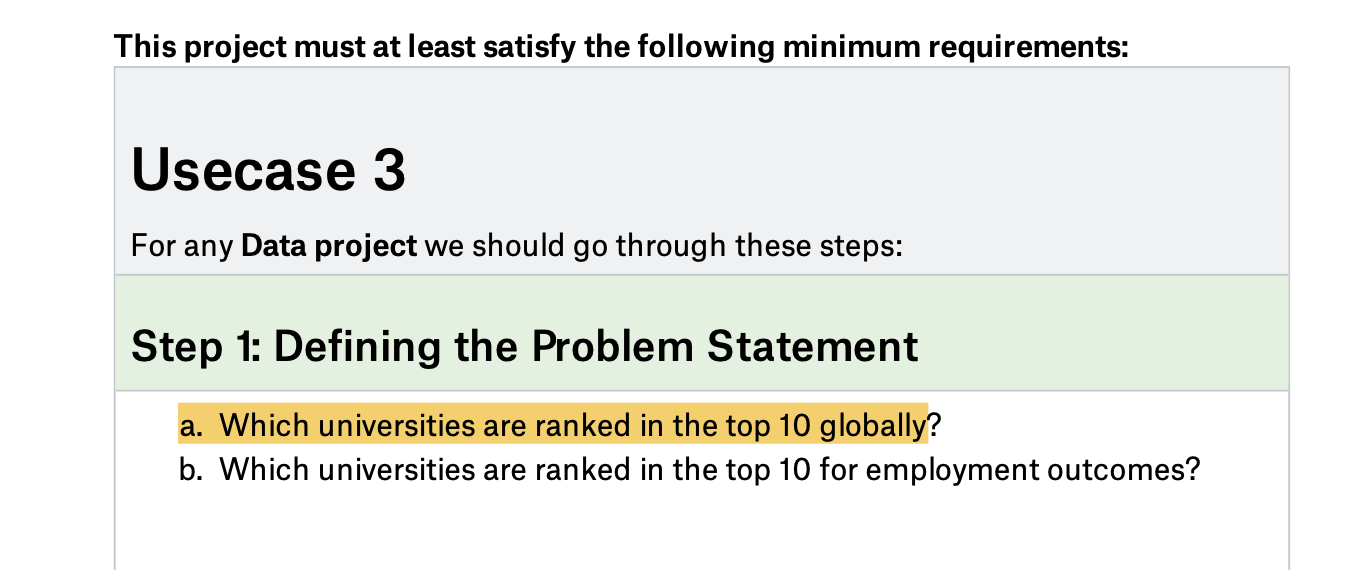
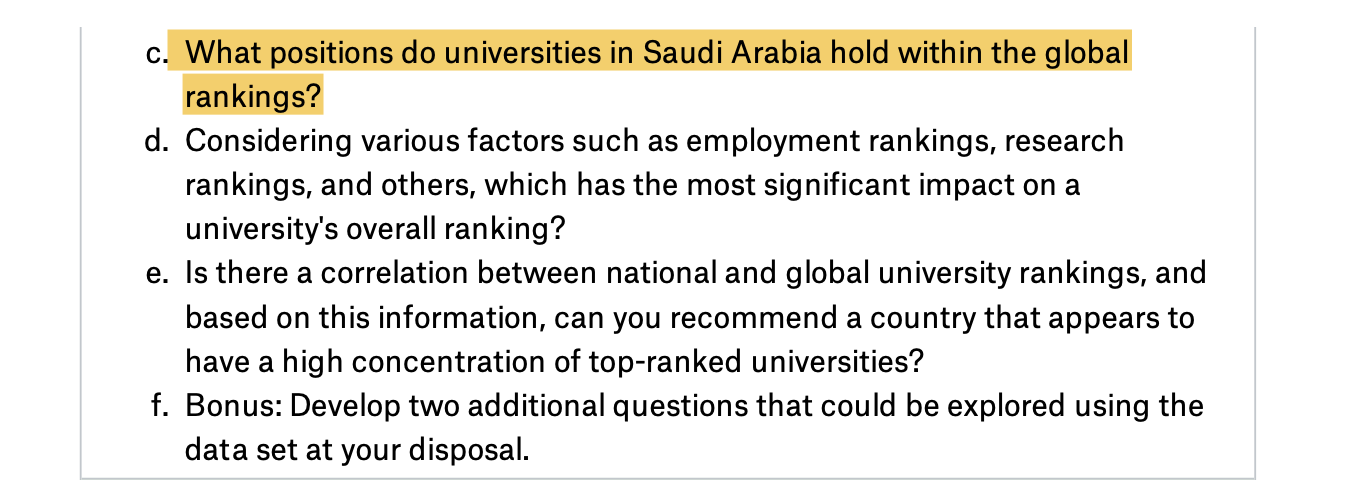

### Which universities are ranked in the top 10 globally?

In [975]:
shanghai_Rank2022.dtypes

Ranking                    object
University Name            object
National/Regional Rank     object
Total Score               float64
LOGO                       object
University Detail          object
dtype: object

In [976]:
shanghai_Rank2022.head(10)

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail
0,1,Harvard University,1,100.0,http://www.shanghairanking.com/_uni/logo/032bd...,http://www.shanghairanking.com/institution/har...
1,2,Stanford University,2,76.8,http://www.shanghairanking.com/_uni/logo/13de8...,http://www.shanghairanking.com/institution/sta...
2,3,Massachusetts Institute of Technology (MIT),3,70.1,http://www.shanghairanking.com/_uni/logo/79165...,http://www.shanghairanking.com/institution/mas...
3,4,University of Cambridge,1,69.6,http://www.shanghairanking.com/_uni/logo/8d986...,http://www.shanghairanking.com/institution/uni...
4,5,"University of California, Berkeley",4,65.3,http://www.shanghairanking.com/_uni/logo/0ff17...,http://www.shanghairanking.com/institution/uni...
5,6,Princeton University,5,60.0,http://www.shanghairanking.com/_uni/logo/b1dad...,http://www.shanghairanking.com/institution/pri...
6,7,University of Oxford,2,58.7,http://www.shanghairanking.com/_uni/logo/c1d96...,http://www.shanghairanking.com/institution/uni...
7,8,Columbia University,6,57.2,http://www.shanghairanking.com/_uni/logo/ce342...,http://www.shanghairanking.com/institution/col...
8,9,California Institute of Technology,7,56.1,http://www.shanghairanking.com/_uni/logo/c956f...,http://www.shanghairanking.com/institution/cal...
9,10,University of Chicago,8,55.1,http://www.shanghairanking.com/_uni/logo/b4f6e...,http://www.shanghairanking.com/institution/uni...


In [977]:
shanghai_Rank2022.dtypes

Ranking                    object
University Name            object
National/Regional Rank     object
Total Score               float64
LOGO                       object
University Detail          object
dtype: object

In [978]:
top_10_shanghai2022 = shanghai_Rank2022[['Total Score', 'University Name']].head(10)

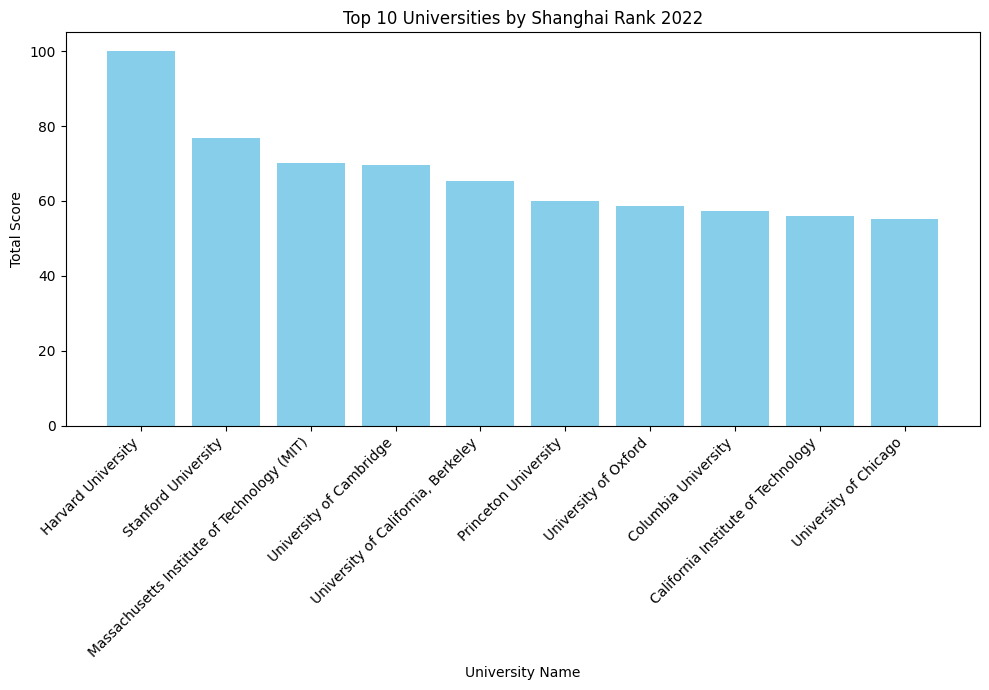

In [979]:
plt.figure(figsize=(10, 7))
plt.bar(
    top_10_shanghai2022["University Name"],
    top_10_shanghai2022["Total Score"],
    color='skyblue'
)

plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Universities by Shanghai Rank 2022")
plt.ylabel("Total Score")
plt.xlabel("University Name")
plt.tight_layout()

plt.show()


In [980]:
shanghai_Rank2023.head(1)

,Rank,Logo,University Name,Link,Website,Flag,Country,Region,Foundation_year,Total_Enrollment,Total_International_Enrollment,UG_Enrollment,International_UG_Enrollment,PG_Enrollment,International_PG_Enrollment
0,1,https://www.shanghairanking.com/_uni/logo/032b...,Harvard University,https://www.shanghairanking.com/institution/ha...,http://www.harvard.edu,us,United States,North America,1636,41987,24.0,14467,10.1,27520,20.1


In [981]:
top_10_shanghai2023["Rank"] = top_10_shanghai2023["Rank"].astype(int)
top_10_shanghai2023 = top_10_shanghai2023.sort_values(by="Rank", ascending=True)

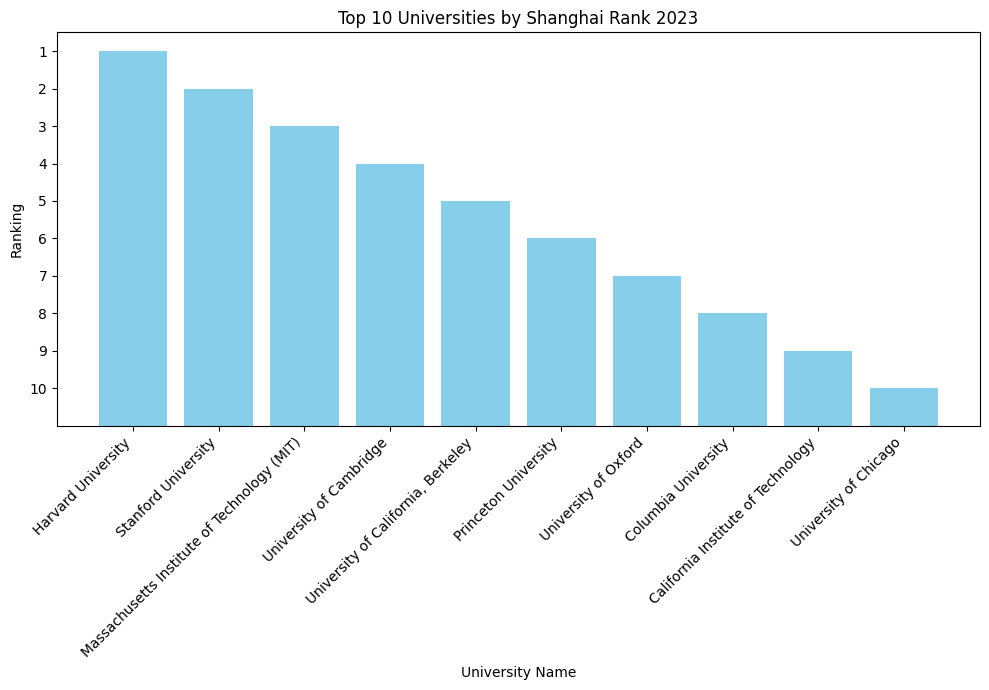

In [982]:
plt.figure(figsize=(10, 7))
plt.bar(
    top_10_shanghai2023["University Name"],
    11 - top_10_shanghai2023["Rank"],
    color='skyblue'
)

plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Universities by Shanghai Rank 2023")
plt.ylabel("Ranking")
plt.xlabel("University Name")
plt.yticks(ticks=range(1, 11), labels=range(10, 0, -1))
plt.tight_layout()

plt.show()


In [983]:
Times_Higher_Rank.head(10)

,Rank,University Name,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,Total Score,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,University of Manchester,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Queen’s University,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Universiti Sains Malaysia,Malaysia,16.0,94.1,2.0,86.4,1.0,84.9,97.8,96.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,University of Tasmania,Australia,13.0,92.8,15.0,96.2,14.0,95.1,96.3,96.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,Arizona State University (Tempe),United States,15.0,95.4,14.0,93.9,6.0,87.6,81.9–86.9,96.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,University of Alberta,Canada,9.0,99.4,2.0,89.2,15.0,91.0,94.4,96.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,RMIT University,Australia,10.0,92.1,8.0,83.7,11.0,87.4,98.5,96.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,Aalborg University,Denmark,4.0,90.6,10.0,90.2,14.0,93.4,98.5,95.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,University of Victoria,Canada,11.0,91.8,13.0,89.4,12.0,88.4,91.9,95.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [984]:
Times_Higher_Rank.dtypes

Rank                          object
University Name               object
Location                      object
sdg-score-multi__number      float64
sdg-score-multi__value        object
sdg-score-multi__number 2    float64
sdg-score-multi__value 2      object
sdg-score-multi__number 3    float64
sdg-score-multi__value 3      object
sdg-score-multi__value 4      object
Total Score                   object
sdg-score-multi__number 5    float64
sdg-score-multi__value 5      object
sdg-score-multi__number 6    float64
sdg-score-multi__value 6      object
sdg-score-multi__number 7    float64
sdg-score-multi__value 7      object
sdg-score-multi__number 8    float64
sdg-score-multi__value 8      object
dtype: object

In [985]:
top_10_times = Times_Higher_Rank[['University Name', 'Total Score']].head(10)
top_10_times['Total Score'] = top_10_times['Total Score'].astype(float)

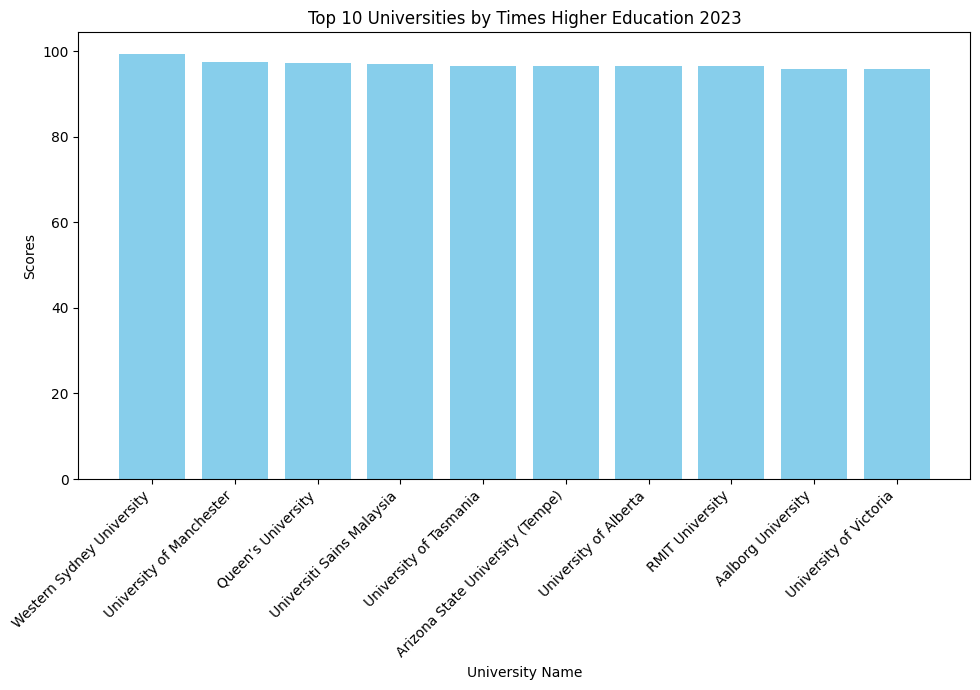

In [986]:
plt.figure(figsize=(10, 7))
plt.bar(
    top_10_times["University Name"],
    top_10_times["Total Score"],
    color='skyblue'
)

plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Universities by Times Higher Education 2023")
plt.ylabel("Scores")
plt.xlabel("University Name")
plt.tight_layout()

plt.show()

In [987]:
World_Rank.head(10)

,World Rank,University Name,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Total Score
0,1,Harvard University,USA,1,1,1,1,1,100.0
1,2,Massachusetts Institute of Technology,USA,2,4,12,3,9,96.7
2,3,Stanford University,USA,3,11,4,2,2,95.2
3,4,University of Cambridge,United Kingdom,1,3,25,5,11,94.1
4,5,University of Oxford,United Kingdom,2,7,27,9,4,93.3
5,6,Princeton University,USA,4,5,16,6,82,92.6
6,7,University of Chicago,USA,5,8,15,22,28,92.1
7,8,Columbia University,USA,6,12,14,10,13,91.6
8,9,University of Pennsylvania,USA,7,14,8,45,12,91.2
9,10,Yale University,USA,8,6,35,13,21,90.8


In [988]:
World_Rank.dtypes

World Rank             object
University Name        object
Location               object
National Rank           int64
Educational Rank       object
Employability Rank     object
Faculty Rank           object
Research Rank          object
Total Score           float64
dtype: object

In [989]:
top_10_world = World_Rank[['University Name', 'Total Score']].head(10)

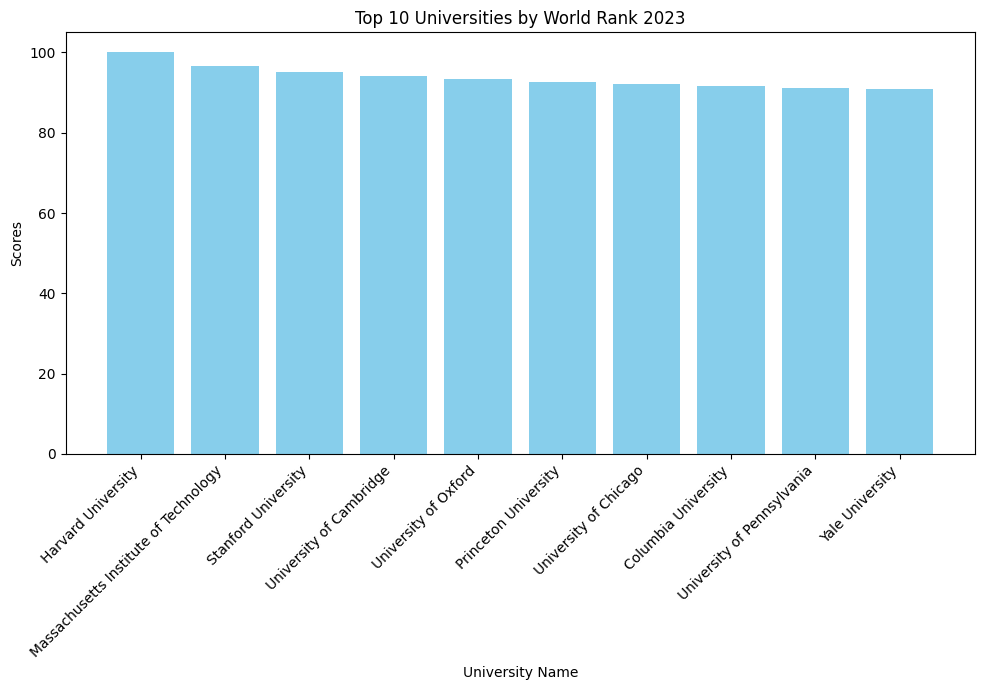

In [990]:
plt.figure(figsize=(10, 7))
plt.bar(
    top_10_world["University Name"],
    top_10_world["Total Score"],
    color='skyblue'
)

plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Universities by World Rank 2023")
plt.ylabel("Scores")
plt.xlabel("University Name")
plt.tight_layout()

plt.show()


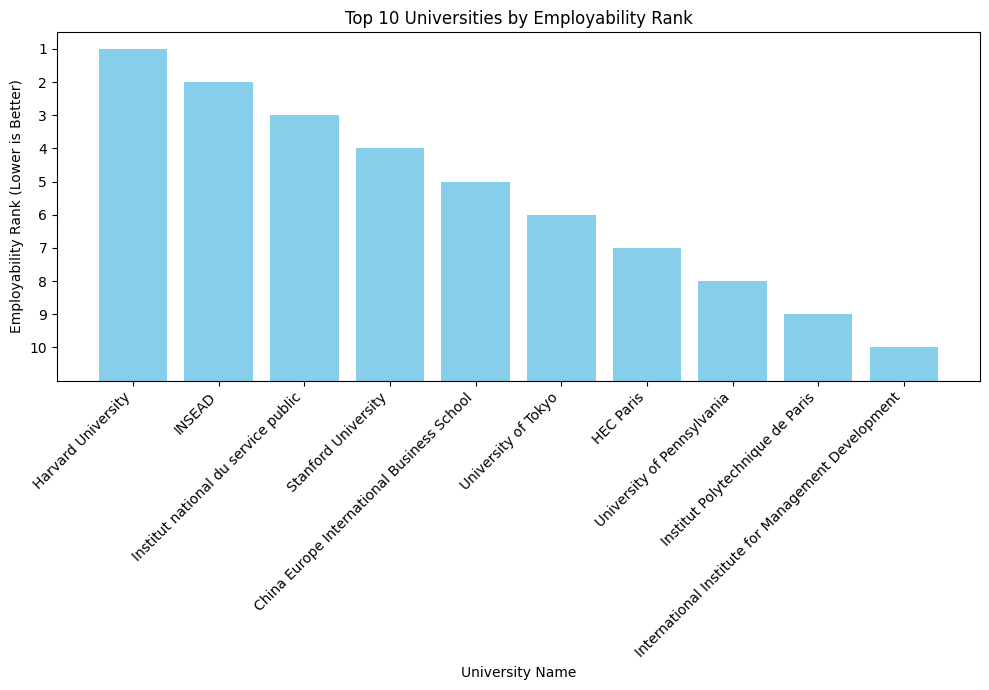

In [ ]:
temp_df = World_Rank.copy()
temp_df["Employability Rank"] = pd.to_numeric(temp_df["Employability Rank"], errors="coerce")
temp_df = temp_df[temp_df["Employability Rank"] > 0]

top_10_employability = temp_df.sort_values(by="Employability Rank", ascending=True).head(10)

plt.figure(figsize=(10, 7))
plt.bar(
    top_10_employability["University Name"],
    11 - top_10_employability["Employability Rank"],
    color='skyblue'
)

plt.xticks(rotation=45, ha="right")
plt.title("Top 10 Universities by Employability Rank")
plt.ylabel("Employability Rank (Lower is Better)")
plt.xlabel("University Name")
plt.yticks(ticks=range(1, 11), labels=range(10, 0, -1))
plt.tight_layout()

plt.show()


 ### Which universities are ranked in the top 10 for employment outcomes?

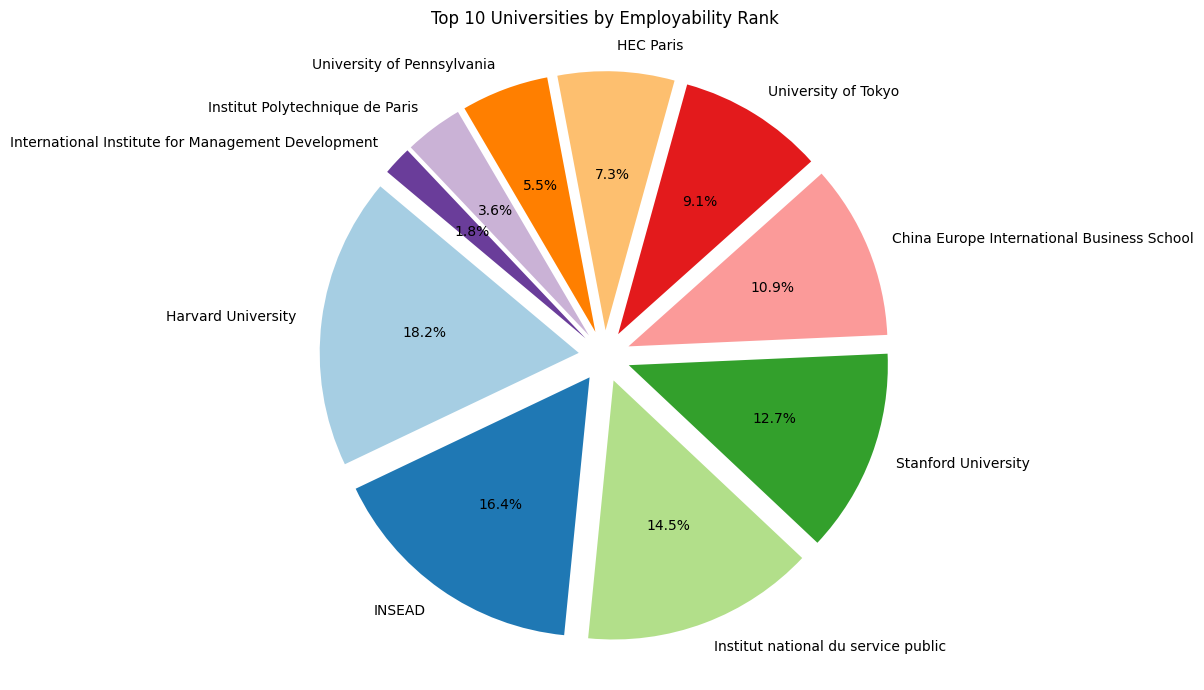

In [1002]:
temp_df = World_Rank.copy()
temp_df["Employability Rank"] = pd.to_numeric(temp_df["Employability Rank"], errors="coerce")
temp_df = temp_df[temp_df["Employability Rank"] > 0]

top_10_employability = temp_df.sort_values(by="Employability Rank", ascending=True).head(10)

plt.figure(figsize=(14, 7))
plt.pie(
    11 - top_10_employability["Employability Rank"],
    labels=top_10_employability["University Name"],
    autopct="%1.1f%%",
    colors=plt.cm.Paired.colors,
    startangle=140,
    explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
)

plt.title("Top 10 Universities by Employability Rank")
plt.tight_layout()
plt.show()


### What positions do universities in Saudi Arabia hold within the global rankings?

In [1004]:
shanghai_Rank2023.head(1)

,Rank,Logo,University Name,Link,Website,Flag,Country,Region,Foundation_year,Total_Enrollment,Total_International_Enrollment,UG_Enrollment,International_UG_Enrollment,PG_Enrollment,International_PG_Enrollment
0,1,https://www.shanghairanking.com/_uni/logo/032b...,Harvard University,https://www.shanghairanking.com/institution/ha...,http://www.harvard.edu,us,United States,North America,1636,41987,24.0,14467,10.1,27520,20.1


In [1005]:
shanghai_Rank2023.dtypes

Rank                               object
Logo                               object
University Name                    object
Link                               object
Website                            object
Flag                               object
Country                            object
Region                             object
Foundation_year                     int64
Total_Enrollment                    int64
Total_International_Enrollment    float64
UG_Enrollment                       int64
International_UG_Enrollment       float64
PG_Enrollment                       int64
International_PG_Enrollment       float64
dtype: object

In [1006]:
shanghai_Rank2023[shanghai_Rank2023['Flag'] == 'sa']

,Rank,Logo,University Name,Link,Website,Flag,Country,Region,Foundation_year,Total_Enrollment,Total_International_Enrollment,UG_Enrollment,International_UG_Enrollment,PG_Enrollment,International_PG_Enrollment
108,101-150,https://www.shanghairanking.com/_uni/logo/a8ed...,King Saud University,https://www.shanghairanking.com/institution/ki...,http://www.ksu.edu.sa,sa,Saudi Arabia,Asia,1957,37616,11.2,33931,11.7,3685,6.5
161,151-200,https://www.shanghairanking.com/_uni/logo-jpg/...,King Abdulaziz University,https://www.shanghairanking.com/institution/ki...,http://www.kau.edu.sa,sa,Saudi Arabia,Asia,1967,32853,22.1,26400,18.1,6453,38.3
220,201-300,https://www.shanghairanking.com/_uni/logo/aebd...,King Abdullah University of Science and Techno...,https://www.shanghairanking.com/institution/ki...,http://www.kaust.edu.sa,sa,Saudi Arabia,Asia,2009,27010,13.3,19561,10.1,7793,20.1
244,201-300,https://www.shanghairanking.com/_uni/logo/df75...,Taif University,https://www.shanghairanking.com/institution/ta...,https://www.tu.edu.sa/En/,sa,Saudi Arabia,Asia,0,36428,2.4,34429,2.5,1999,0.9
347,301-400,https://www.shanghairanking.com/_uni/logo/82cf...,Princess Nourah bint Abdulrahman University,https://www.shanghairanking.com/institution/pr...,https://www.pnu.edu.sa/,sa,Saudi Arabia,Asia,0,23806,19.0,19135,21.0,4671,11.2
421,401-500,https://www.shanghairanking.com/_uni/logo/d599...,King Fahd University of Petroleum & Minerals,https://www.shanghairanking.com/institution/ki...,http://www.kfupm.edu.sa,sa,Saudi Arabia,Asia,1963,6882,13.0,19561,10.1,7793,20.1
422,401-500,https://www.shanghairanking.com/_uni/logo/1486...,King Khalid University,https://www.shanghairanking.com/institution/ki...,https://www.kku.edu.sa/en,sa,Saudi Arabia,Asia,0,27010,13.3,19561,10.1,7793,20.1
542,501-600,https://www.shanghairanking.com/images/default...,Prince Sattam Bin Abdulaziz University,https://www.shanghairanking.com/institution/pr...,https://www.psau.edu.sa/en,sa,Saudi Arabia,Asia,0,27010,13.3,19561,10.1,7793,20.1
837,801-900,https://www.shanghairanking.com/_uni/logo/7955...,King Faisal University,https://www.shanghairanking.com/institution/ki...,https://www.kfu.edu.sa/en/Pages/home.aspx,sa,Saudi Arabia,Asia,0,27010,13.3,19561,10.1,7793,20.1
850,801-900,https://www.shanghairanking.com/images/default...,Qassim University,https://www.shanghairanking.com/institution/qa...,https://qu.edu.sa/,sa,Saudi Arabia,Asia,0,27010,13.3,19561,10.1,7793,20.1


In [1085]:
saudi_universities_shanghai = shanghai_Rank2023[shanghai_Rank2023['Flag'] == 'sa'].copy()


saudi_universities_shanghai['Rank'] = saudi_universities_shanghai['Rank'].apply(lambda x: int(x.split('-')[0]) if '-' in x else int(x))


saudi_universities = saudi_universities_shanghai.sort_values(by="Rank")

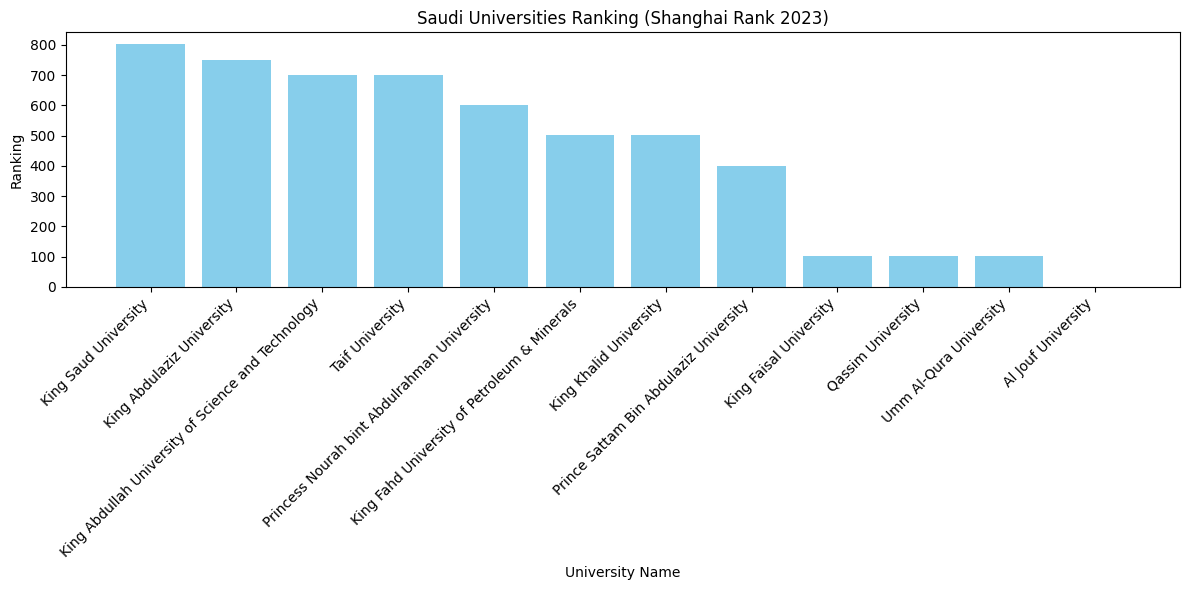

In [1086]:
saudi_universities["Rank"] = saudi_universities["Rank"].astype(int)
saudi_universities = saudi_universities.sort_values(by="Rank", ascending=True)

plt.figure(figsize=(12, 6))
plt.bar(
    saudi_universities["University Name"],
    max(saudi_universities["Rank"]) - saudi_universities["Rank"] + 1, 
    color='skyblue'
)

plt.xticks(rotation=45, ha="right")
plt.title("Saudi Universities Ranking (Shanghai Rank 2023)")
plt.ylabel("Ranking")
plt.xlabel("University Name")
plt.tight_layout()

plt.show()


In [1087]:
Times_Higher_Rank.head(1)

,Rank,University Name,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,Total Score,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1088]:
Times_Higher_Rank[Times_Higher_Rank['Location'] == 'Saudi Arabia']

,Rank,University Name,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,Total Score,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
136,101–200,King Abdullah University of Science and Techno...,Saudi Arabia,0.0,0.0,14.0,93.7,0.0,0.0,95.9,82.2–88.2,0.0,0.0,6.0,88.0,0.0,0.0,7.0,70.9
137,101–200,King Faisal University,Saudi Arabia,2.0,77.7,7.0,78.6,0.0,0.0,81.9–86.9,82.2–88.2,1.0,80.1,0.0,0.0,0.0,0.0,0.0,0.0
164,101–200,Prince Mohammad Bin Fahd University,Saudi Arabia,10.0,65.2–73.3,8.0,62.4–66.3,14.0,73.7,90.7,82.2–88.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205,201–300,AlMaarefa University,Saudi Arabia,0.0,0.0,1.0,71.5,0.0,0.0,81.9–86.9,76.8–82.1,0.0,0.0,8.0,62.4–66.3,3.0,81.6,0.0,0.0
243,201–300,Imam Abdulrahman Bin Faisal University,Saudi Arabia,5.0,61.5–66.9,0.0,0.0,6.0,73.7,89.0,76.8–82.1,3.0,89.6,0.0,0.0,0.0,0.0,0.0,0.0
244,201–300,Imam Mohammad Ibn Saud Islamic University,Saudi Arabia,0.0,0.0,16.0,70.0–77.0,0.0,0.0,81.9–86.9,76.8–82.1,8.0,62.4–66.3,0.0,0.0,0.0,0.0,4.0,82.2
251,201–300,King Fahd University of Petroleum and Minerals,Saudi Arabia,8.0,75.0,0.0,0.0,14.0,75.0,81.9–86.9,76.8–82.1,0.0,0.0,0.0,0.0,0.0,0.0,9.0,95.6
378,301–400,Prince Sultan University (PSU),Saudi Arabia,8.0,74.6,16.0,63.7–69.9,5.0,43.7–51.5,75.6–81.7,72.7–76.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
482,401–600,King Khalid University,Saudi Arabia,6.0,69.4,0.0,0.0,0.0,0.0,53.4–61.0,66.9–72.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
539,401–600,Qassim University,Saudi Arabia,1.0,79.1,8.0,57.8–62.2,4.0,73.1,81.9–86.9,66.9–72.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


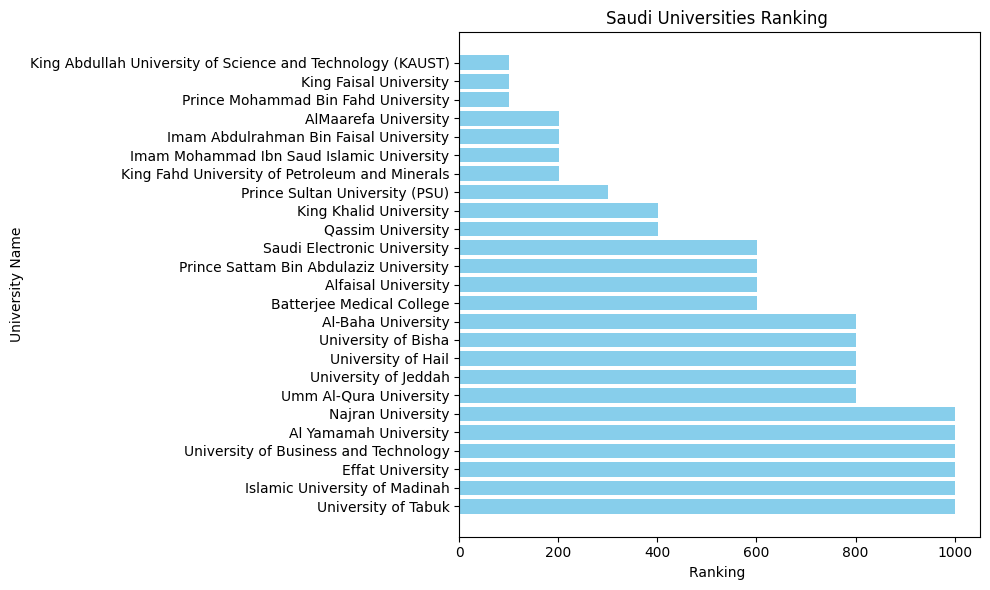

In [1089]:
saudi_universities_times = Times_Higher_Rank[Times_Higher_Rank['Location'] == 'Saudi Arabia'].copy()


def clean_rank(rank):
    if '–' in rank:  
        return int(rank.split('–')[0])
    elif '-' in rank: 
        return int(rank.split('-')[0])
    elif '+' in rank:  
        return int(rank.replace('+', ''))
    else:
        return int(rank)  

saudi_universities_times['Rank'] = saudi_universities_times['Rank'].apply(clean_rank)


saudi_universities_times = saudi_universities_times.sort_values(by="Rank")


plt.figure(figsize=(10, 6))
plt.barh(
    saudi_universities_times["University Name"],
    saudi_universities_times["Rank"],
    color='skyblue'
)
plt.gca().invert_yaxis()
plt.title("Saudi Universities Ranking ")
plt.xlabel("Ranking ")
plt.ylabel("University Name")
plt.tight_layout()


plt.show()

In [1090]:
World_Rank.columns

Index(['World Rank', 'University Name', 'Location', 'National Rank',
       'Educational Rank', 'Employability Rank', 'Faculty Rank',
       'Research Rank', 'Total Score'],
      dtype='object')

In [1091]:
 World_Rank[World_Rank['Location'] == 'Saudi Arabia']

,World Rank,University Name,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Total Score
244,245,King Abdulaziz University,Saudi Arabia,1,0,1330,0,186,77.8
278,279,King Abdullah University of Science and Techno...,Saudi Arabia,2,0,0,171,297,77.2
351,352,King Saud University,Saudi Arabia,3,0,344,0,332,76.1
656,657,King Fahd University of Petroleum and Minerals,Saudi Arabia,4,0,107,0,792,72.8
1310,1311,King Saud bin Abdulaziz University for Health ...,Saudi Arabia,5,0,0,0,1255,68.8
1446,1447,King Khalid University,Saudi Arabia,6,0,0,0,1385,68.1
1508,1509,Taif University,Saudi Arabia,7,0,0,0,1445,67.9
1546,1547,Imam Abdulrahman Bin Faisal University,Saudi Arabia,8,0,0,0,1484,67.7
1585,1586,Taibah University,Saudi Arabia,9,0,0,0,1520,67.5
1710,1711,Prince Sattam Bin Abdulaziz University,Saudi Arabia,10,0,0,0,1636,67.0


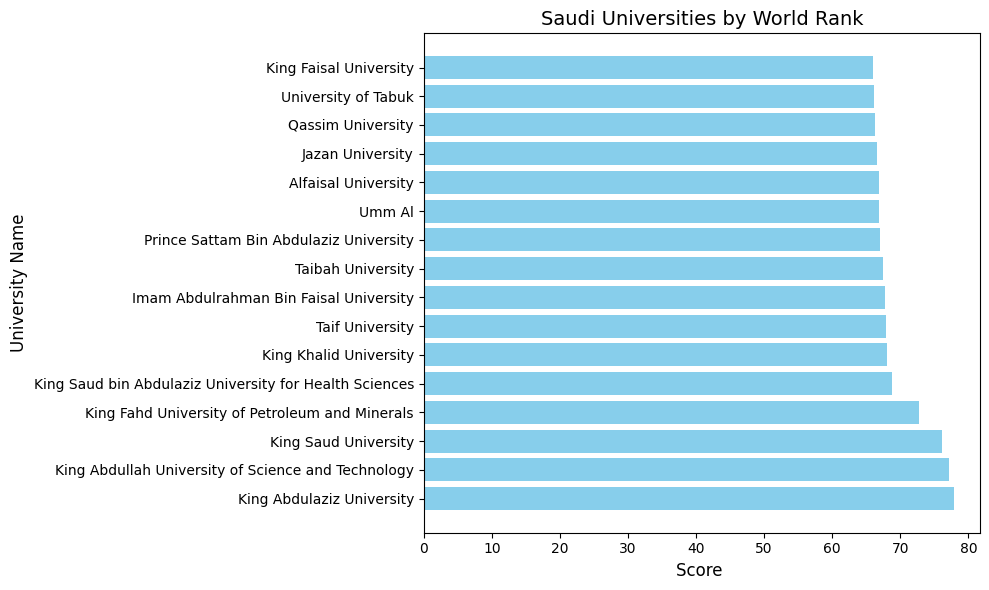

In [1092]:
saudi_universities = World_Rank[World_Rank['Location'] == 'Saudi Arabia'].copy()


saudi_universities['Total Score'] = pd.to_numeric(saudi_universities['Total Score'], errors='coerce')


saudi_universities = saudi_universities.sort_values(by="Total Score")


plt.figure(figsize=(10, 6))
plt.barh(
    saudi_universities["University Name"],
    saudi_universities["Total Score"],
    color='skyblue'
)
plt.gca().invert_yaxis()  
plt.title("Saudi Universities by World Rank", fontsize=14)
plt.xlabel("Score ", fontsize=12)
plt.ylabel("University Name", fontsize=12)
plt.tight_layout()


plt.show()

In [1093]:
# "Foundation Year" should be deleted Because its contains outliers and its irrelevant to our usecase
temp = shanghai_Rank2023['Foundation_year']


KeyError: 'Foundation_year'

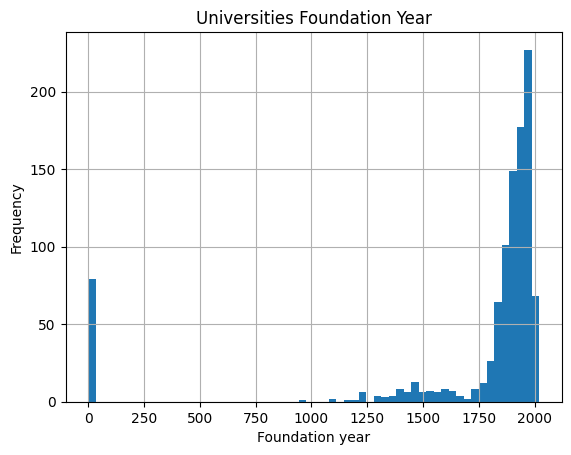

In [ ]:
plt.hist(temp,

          bins = 60
        )
plt.xlabel('Foundation year')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Universities Foundation Year')
plt.show()

In [1101]:
shanghai_Rank2022.dtypes

Ranking                    object
University Name            object
National/Regional Rank     object
Total Score               float64
LOGO                       object
University Detail          object
dtype: object

In [1103]:
temp2022 = shanghai_Rank2022["Total Score"]


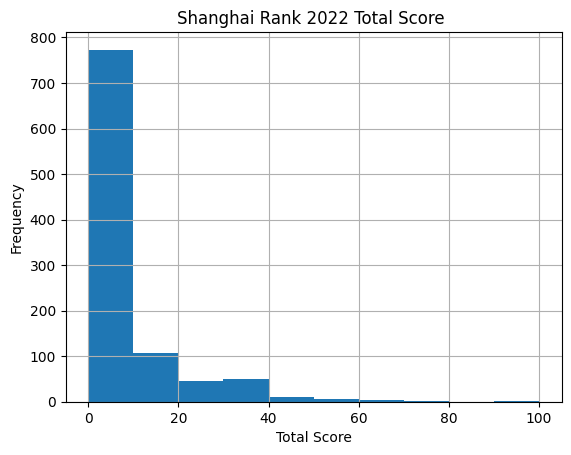

In [1109]:
#plt.figure(figsize=(18,12))
plt.hist(temp2022,
         #,facecolor = 'b', edgecolor = 'red',
          bins = 10
        ) # bins = 6 means 6 bars
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.grid()
plt.title(f'Shanghai Rank 2022 Total Score ')
plt.show()

In [ ]:
saudi_universities_times = Times_Higher_Rank[Times_Higher_Rank['Location'] == 'Saudi Arabia'].copy()

In [1113]:
shanghai_zeroes=shanghai_Rank2022[shanghai_Rank2022["Total Score"] == 0.0].copy()

In [1115]:
shanghai_zeroes.shape

(740, 6)

In [1116]:
shanghai_Rank2022.head(310)

,Ranking,University Name,National/Regional Rank,Total Score,LOGO,University Detail
0,1,Harvard University,1,100.0,http://www.shanghairanking.com/_uni/logo/032bd...,http://www.shanghairanking.com/institution/har...
1,2,Stanford University,2,76.8,http://www.shanghairanking.com/_uni/logo/13de8...,http://www.shanghairanking.com/institution/sta...
2,3,Massachusetts Institute of Technology (MIT),3,70.1,http://www.shanghairanking.com/_uni/logo/79165...,http://www.shanghairanking.com/institution/mas...
3,4,University of Cambridge,1,69.6,http://www.shanghairanking.com/_uni/logo/8d986...,http://www.shanghairanking.com/institution/uni...
4,5,"University of California, Berkeley",4,65.3,http://www.shanghairanking.com/_uni/logo/0ff17...,http://www.shanghairanking.com/institution/uni...
...,...,...,...,...,...,...
305,301-400,Beijing University of Chemical Technology,41-58,0.0,http://www.shanghairanking.com/_uni/logo/46052...,http://www.shanghairanking.com/institution/bei...
306,301-400,Brandeis University,86-106,18.5,http://www.shanghairanking.com/_uni/logo/c824f...,http://www.shanghairanking.com/institution/bra...
307,301-400,Cairo University,1,17.7,http://www.shanghairanking.com/_uni/logo/88161...,http://www.shanghairanking.com/institution/cai...
308,301-400,Capital Medical University,41-58,0.0,http://www.shanghairanking.com/_uni/logo/63885...,http://www.shanghairanking.com/institution/cap...


In [1096]:
shanghai_Rank2023.head(1)

,Rank,Logo,University Name,Link,Website,Flag,Country,Region,Total_Enrollment,Total_International_Enrollment,UG_Enrollment,International_UG_Enrollment,PG_Enrollment,International_PG_Enrollment
0,1,https://www.shanghairanking.com/_uni/logo/032b...,Harvard University,https://www.shanghairanking.com/institution/ha...,http://www.harvard.edu,us,United States,North America,41987,24.0,14467,10.1,27520,20.1


In [1120]:
shanghai_Rank2023["Region"].value_counts()


Region
Asia             356
Europe           345
North America    213
Oceania           42
Latin America     27
Africa            17
Name: count, dtype: int64

In [ ]:
counts_region = shanghai_Rank2023["Region"].value_counts()

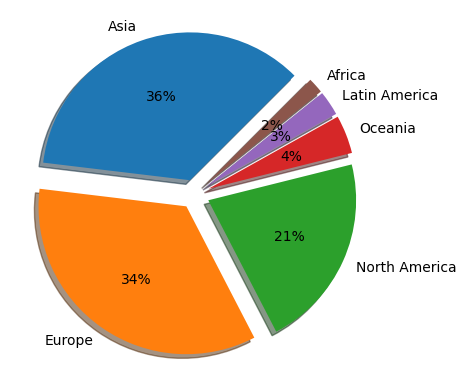

In [1125]:
plt.pie(x=counts_region.values,
        labels=counts_region.index,
        autopct='%1.0f%%',
        startangle=45,
        shadow=True,
        explode = [0.1,0.1,0.1,0.1,0.1,0.1]
       )
plt.show()

/var/folders/rx/2m4195h90h7983jbhp4kkypc0000gn/T/ipykernel_7402/753053587.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


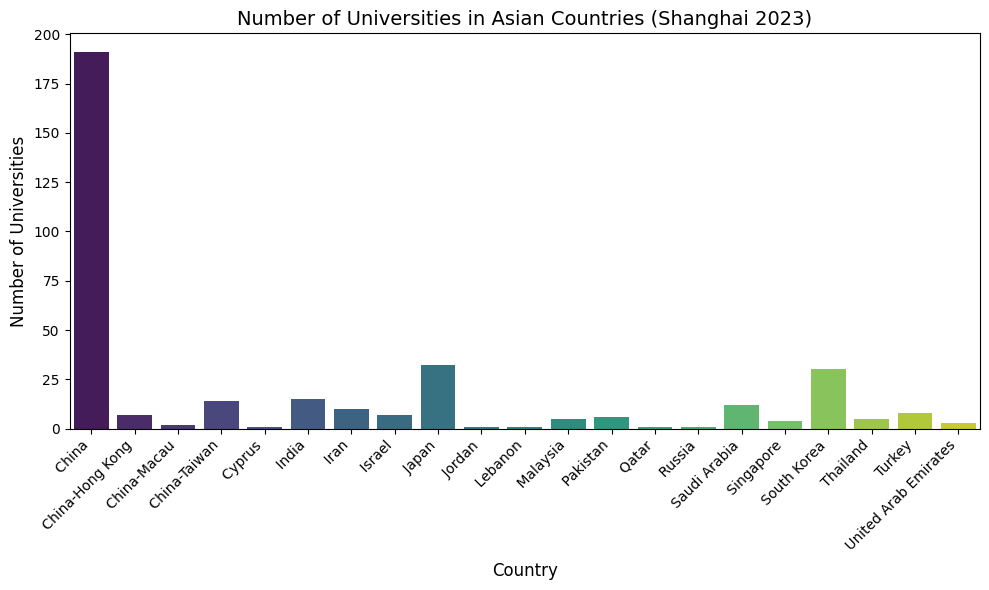

In [1135]:
asia_data = shanghai_Rank2023[shanghai_Rank2023["Region"] == "Asia"]

asia_grouped = asia_data.groupby("Country").size().reset_index(name="Count")


plt.figure(figsize=(10, 6))
sns.barplot(
    data=asia_grouped,
    x="Country",
    y="Count",
    palette="viridis"
)
plt.title("Number of Universities in Asian Countries (Shanghai 2023)", fontsize=14)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Universities", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


plt.show()

In [1134]:
Times_Higher_Rank.dtypes

Rank                          object
University Name               object
Location                      object
sdg-score-multi__number      float64
sdg-score-multi__value        object
sdg-score-multi__number 2    float64
sdg-score-multi__value 2      object
sdg-score-multi__number 3    float64
sdg-score-multi__value 3      object
sdg-score-multi__value 4      object
Total Score                   object
sdg-score-multi__number 5    float64
sdg-score-multi__value 5      object
sdg-score-multi__number 6    float64
sdg-score-multi__value 6      object
sdg-score-multi__number 7    float64
sdg-score-multi__value 7      object
sdg-score-multi__number 8    float64
sdg-score-multi__value 8      object
dtype: object

In [1133]:
Times_Higher_Rank.head(10)

,Rank,University Name,Location,sdg-score-multi__number,sdg-score-multi__value,sdg-score-multi__number 2,sdg-score-multi__value 2,sdg-score-multi__number 3,sdg-score-multi__value 3,sdg-score-multi__value 4,Total Score,sdg-score-multi__number 5,sdg-score-multi__value 5,sdg-score-multi__number 6,sdg-score-multi__value 6,sdg-score-multi__number 7,sdg-score-multi__value 7,sdg-score-multi__number 8,sdg-score-multi__value 8
0,1,Western Sydney University,Australia,5.0,80.3,12.0,93.4,15.0,96.7,98.8,99.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,University of Manchester,United Kingdom,15.0,97.4,12.0,92.9,11.0,92.2,94.8,97.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Queen’s University,Canada,2.0,90.6,16.0,93.4,11.0,91.0,92.6,97.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Universiti Sains Malaysia,Malaysia,16.0,94.1,2.0,86.4,1.0,84.9,97.8,96.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,University of Tasmania,Australia,13.0,92.8,15.0,96.2,14.0,95.1,96.3,96.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,Arizona State University (Tempe),United States,15.0,95.4,14.0,93.9,6.0,87.6,81.9–86.9,96.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,University of Alberta,Canada,9.0,99.4,2.0,89.2,15.0,91.0,94.4,96.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,7,RMIT University,Australia,10.0,92.1,8.0,83.7,11.0,87.4,98.5,96.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,Aalborg University,Denmark,4.0,90.6,10.0,90.2,14.0,93.4,98.5,95.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,9,University of Victoria,Canada,11.0,91.8,13.0,89.4,12.0,88.4,91.9,95.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1146]:
World_Rank.dtypes

World Rank             object
University Name        object
Location               object
National Rank           int64
Educational Rank        int64
Employability Rank      int64
Faculty Rank            int64
Research Rank           int64
Total Score           float64
dtype: object

In [1149]:
World_Rank.tail(10)

,World Rank,University Name,Location,National Rank,Educational Rank,Employability Rank,Faculty Rank,Research Rank,Total Score
1990,1991,Hunan University of Technology,China,312,0,0,0,1913,66.0
1991,1992,Zurich University of Applied Sciences (ZHAW),Switzerland,13,0,909,0,1927,66.0
1992,1993,Technical University of Košice,Slovak Republic,4,0,0,0,1914,66.0
1993,1994,Guangdong Ocean University,China,313,0,0,0,1915,66.0
1994,1995,University of Djillali Liabès,Algeria,2,0,0,0,1916,66.0
1995,1996,Chongqing Jiaotong University,China,314,0,0,0,1917,66.0
1996,1997,University of Arkansas at Little Rock,USA,332,0,1322,0,1920,66.0
1997,1998,Van Yüzüncü Yıl University,Turkey,54,0,0,0,1919,66.0
1998,1999,Bharathidasan University,India,64,0,0,0,1922,66.0
1999,2000,Gebze Technical University,Turkey,55,0,0,0,1923,66.0
